In [0]:
import datetime # Check week number
import numpy as np
import warnings
import ast
import itertools
import numpy as np
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize  
warnings.filterwarnings("ignore")
#plt.style.use('fivethirtyeight')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import seaborn as sns
import pandas as pd

In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_fscore_support
std=StandardScaler()
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [0]:
#!pip install logitboost

In [0]:
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
#from logitboost import LogitBoost
from sklearn.neighbors import (NeighborhoodComponentsAnalysis,KNeighborsClassifier)
from sklearn import preprocessing
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
  lb = preprocessing.LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred)
  return roc_auc_score(y_test, y_pred, average=average)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
def get_season(i):
    if (i ==1)|(i==2): 
        return 1  #Winter
    if (i ==3)|(i==4): 
        return 2   #Spring
    if (i>4) & (i<9): 
        return 3 #Summer
    if (i ==9) |( i==10): 
        return 4  #Fall
    if (i ==11)|( i==12): 
        return 5 #Holiday

# data loading

In [0]:
G= pd.read_csv("/content/drive/My Drive/thesis/Genre_forecasting_budget.csv",index_col=['Unnamed: 0','Month_start_Date'])
G.Genre=G.Genre.replace('Thriller/Suspense','Thriller')
G.Genre=G.Genre.replace('Romantic Comedy','Romance')
G.Genre=G.Genre.replace('Musical','Music')

In [0]:
Gg= pd.read_csv("/content/drive/My Drive/thesis/Genre_forecasting.csv",index_col=['Unnamed: 0','Weak_start_Date'])
Gg.Genre=Gg.Genre.replace('Thriller/Suspense','Thriller')
Gg.Genre=Gg.Genre.replace('Romantic Comedy','Romance')
Gg.Genre=Gg.Genre.replace('Musical','Music')
Gg['Season']=Gg.Month.apply(get_season)

In [0]:
Gg['Budget_all']=G.budget_all
Gg['Budget_movie']=G.budget_movie
Gg['Budget_true']=G.budget_true
Gg['Budget_Pred']=G.budget_Pred

In [0]:
gggm=Gg.groupby([Gg.Month,Gg.Year,Gg.Genre])['Gross_all', 'Gross_true', 'Gross_genre',
       'Gross_Pred', 'ROI_true', 'ROI_Pred', 'ROI_all', 'Count_Pred',
       'Count_true', 'Count_all', 'Success_Pred', 'Success_true',
       'Success_all','Budget_all','Budget_movie','Budget_true','Budget_Pred'].mean()
gggm

Gross_all  ...  Budget_Pred
Month Year Genre                            ...             
1     1973 Action                        0  ...          NaN
           Adventure                     0  ...          NaN
           Black Comedy                  0  ...          NaN
           Comedy                        0  ...          NaN
           Concert/Performance           0  ...          NaN
...                                    ...  ...          ...
12    2018 Horror               1014750952  ...     0.045488
           Music                1014750952  ...     0.017714
           Romance              1014750952  ...     0.021240
           Thriller             1014750952  ...     0.036655
           Western              1014750952  ...     0.019687

[6792 rows x 17 columns]

In [0]:
ggg=Gg.groupby([Gg.Season,Gg.Year,Gg.Genre])['Gross_all', 'Gross_true', 'Gross_genre',
       'Gross_Pred', 'ROI_true', 'ROI_Pred', 'ROI_all', 'Count_Pred',
       'Count_true', 'Count_all', 'Success_Pred', 'Success_true',
       'Success_all','Budget_all','Budget_movie','Budget_true','Budget_Pred'].mean()
ggg

Gross_all  ...  Budget_Pred
Season Year Genre                              ...             
1      1973 Action               0.000000e+00  ...          NaN
            Adventure            0.000000e+00  ...          NaN
            Black Comedy         0.000000e+00  ...          NaN
            Comedy               0.000000e+00  ...          NaN
            Concert/Performance  0.000000e+00  ...          NaN
...                                       ...  ...          ...
5      2018 Horror               1.049839e+09  ...     0.044643
            Music                1.049839e+09  ...     0.035974
            Romance              1.049839e+09  ...     0.010825
            Thriller             1.049839e+09  ...     0.064085
            Western              1.049839e+09  ...     0.015756

[2832 rows x 17 columns]

In [0]:
Fset=pd.read_csv("/content/drive/My Drive/thesis/Full_Feature_set_for_Prediction_v3.csv")
Fset = Fset.drop('Unnamed: 0',axis=1)
Fset.head(2)

,budget,genres,id,original_title,overview,popularity,release_date,revenue,vote_average,vote_count,ROI,cast,Profit,Year,dir,Dir Total Gross,Dir Avg Gross,Dir Avg Rating,Director Total Profit,Director Avg Profit,Director Top Profit,Cast Total Rev,Cast Mean Rev,Cast Mean Avg Rev,Total Tenure,Average Tenure,Cast Total Proft,Cast total Avg Profit,Cast Avg Profit,Cast Top Profit,Cast top avg profit,Cast Avg Rating,Cast ADC Freq,Cast ADC Profit,Cast ADC Rating,Cast Mean top Profit,Full Cast Mean Rev,Cast Total Members,Cast Mean No Movies,Cast Total Movies,...,CastNovelty,AvgAnnualProfit,APPG,AWPG,Competition,Rep_Genre,Genre,APPG_ROI,APPG_Profit,AWPG_Profit,AWPG_ROI,Gross_all,Gross_true,Gross_genre,Gross_Pred,ROI_true,ROI_Pred,ROI_all,Count_Pred,Count_true,Count_all,Success_Pred,Success_true,Success_all,plot_topic_15,plot_topic,actor1rating,actor1experience,actor1score,actor2rating,actor2experience,actor2score,actor3rating,actor3experience,actor3score,Director_Rating,First_Genre,Genre_Score,Director_Experience,WAGE
0,30000000.0,"['Animation', 'Comedy', 'Family']",862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,7.7,5415.0,11.451801,"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",343554033.0,1995,John Lasseter,2.256015e+09,451203061.2,6.84,1.696015e+09,339203061.2,407366869.0,4.403574e+10,3.387365e+09,2.778921e+08,324.326988,24.948230,3.368970e+10,2.832560e+09,2.178892e+08,866969703.0,4.066577e+08,6.723986,28,3.635916e+08,7.449231,7.157361e+08,3.387365e+09,13,12.461538,162,...,85.529328,6.649194e+07,44.444444,4.066490e+09,1.774918e+10,Adventure,Adventure,28.888889,22.222222,3.844918e+09,268.557666,180649700.0,0.023282,4205968.0,NaN,0.165113,NaN,-47.736445,NaN,0.071429,28.0,NaN,0.100000,10.0,11,25,277.1,41,9.790172e+09,74.2,12,3.051470e+09,44.5,6,2.097375e+09,34.2,Animation,3.404242e+10,5.0,1662.504469
1,120000000.0,"['Adventure', 'Animation', 'Comedy', 'Family']",9487,A Bug's Life,"On behalf of ""oppressed bugs everywhere,"" an i...",16.869209,1998-11-25,363258859.0,6.8,2379.0,2.027157,"['Kevin Spacey', 'Julia Louis-Dreyfus', 'Hayde...",243258859.0,1998,John Lasseter,2.256015e+09,451203061.2,6.84,1.696015e+09,339203061.2,407366869.0,4.786192e+10,3.190795e+09,2.565331e+08,324.326988,21.621799,3.497368e+10,2.781109e+09,1.854073e+08,873784195.0,3.873244e+08,6.552608,27,2.707210e+08,6.767667,5.098528e+08,3.104426e+09,16,12.375000,198,...,113.507799,6.103606e+07,72.727273,4.973089e+09,2.096968e+10,Adventure,Adventure,25.757576,25.757576,3.788660e+09,218.798010,539267190.0,0.253670,136796159.0,NaN,0.047608,NaN,-133.006695,NaN,0.074074,54.0,NaN,0.166667,12.0,2,25,206.3,31,3.431960e+09,39.4,6,7.105893e+08,70.2,12,1.356442e+09,34.2,Adventure,8.145082e+10,5.0,2226.875593


In [0]:
Fset_Full1=pd.merge(Fset,ggg, how='left',on=['Year','Season','Genre'])

In [0]:
Fset.plot_topic.unique()

array([25, 20, 16, 18,  9,  1, 23, 22, 12,  2,  3,  6,  4, 15,  5, 11,  8,
       21,  7, 13,  0, 17, 28])

In [0]:
Fset.sort_values(ascending=True, by='revenue').head(10)

,budget,genres,id,original_title,overview,popularity,release_date,revenue,vote_average,vote_count,ROI,cast,Profit,Year,dir,Dir Total Gross,Dir Avg Gross,Dir Avg Rating,Director Total Profit,Director Avg Profit,Director Top Profit,Cast Total Rev,Cast Mean Rev,Cast Mean Avg Rev,Total Tenure,Average Tenure,Cast Total Proft,Cast total Avg Profit,Cast Avg Profit,Cast Top Profit,Cast top avg profit,Cast Avg Rating,Cast ADC Freq,Cast ADC Profit,Cast ADC Rating,Cast Mean top Profit,Full Cast Mean Rev,Cast Total Members,Cast Mean No Movies,Cast Total Movies,...,CastNovelty,AvgAnnualProfit,APPG,AWPG,Competition,Rep_Genre,Genre,APPG_ROI,APPG_Profit,AWPG_Profit,AWPG_ROI,Gross_all,Gross_true,Gross_genre,Gross_Pred,ROI_true,ROI_Pred,ROI_all,Count_Pred,Count_true,Count_all,Success_Pred,Success_true,Success_all,plot_topic_15,plot_topic,actor1rating,actor1experience,actor1score,actor2rating,actor2experience,actor2score,actor3rating,actor3experience,actor3score,Director_Rating,First_Genre,Genre_Score,Director_Experience,WAGE
3281,592.0,"['Romance', 'Drama']",53230,The Merry Widow,Prince Danilo falls in love with dancer Sally ...,0.286719,1925-08-26,1.0,6.5,6.0,-0.998311,"['Mae Murray', ""Roy D'Arcy"", 'John Gilbert', '...",-591.0,1925,Erich von Stroheim,4.002010e+05,2.001005e+05,6.450,-7.003910e+05,-3.501955e+05,-5.910000e+02,5.810289e+07,7.262862e+06,2.419808e+06,41.922832,5.240354,5.314116e+07,1.772585e+07,2.215731e+06,2.175500e+07,5.883852e+06,6.677083,8,-5.910000e+02,6.500000,6.145463e+06,7.262862e+06,8,2.250000,18,...,31.959148,7.822600e+04,100.000000,7.822600e+04,5.600056e+08,Romance,Romance,0.000000,0.000000,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,25,6.5,1,1.000000e+00,6.5,1,1.000000e+00,28.2,4,2.526800e+07,12.9,Romance,8.343943e+09,2.0,109.332969
3520,200000.0,"['Adventure', 'Action', 'Comedy', 'Science Fic...",14301,Dr. Horrible's Sing-Along Blog,"Dr. Horrible, an aspiring supervillain with hi...",8.927994,2008-07-15,3.0,7.8,236.0,-0.999985,"['Neil Patrick Harris', 'Nathan Fillion', 'Fel...",-199997.0,2008,Joss Whedon,2.963831e+09,7.409578e+08,7.475,2.424631e+09,6.061578e+08,1.299558e+09,5.473080e+09,3.648720e+08,2.864131e+07,48.866164,3.257744,3.695080e+09,2.836606e+08,1.891071e+07,6.033286e+08,1.678558e+08,7.472065,16,-1.976816e+05,7.786667,7.422973e+07,3.219459e+08,17,2.941176,50,...,82.878586,6.247541e+07,71.710526,1.519652e+10,2.168293e+10,Adventure,Adventure,24.342105,28.289474,1.327770e+10,308.952307,1.128233e+09,0.228233,257500393.0,NaN,0.227361,NaN,-148.868712,NaN,0.203704,54.0,NaN,0.181818,11.0,2,25,104.9,17,2.622940e+09,74.6,11,2.658114e+09,7.8,1,3.000000e+00,29.9,Adventure,8.145082e+10,4.0,226.548306
2356,6400000.0,"['Thriller', 'Romance']",48781,Never Talk to Strangers,"Sarah Taylor, a police psychologist, meets a m...",7.506958,1995-10-20,6.0,4.7,31.0,-0.999999,"['Rebecca De Mornay', 'Antonio Banderas', 'Den...",-6399994.0,1995,Peter Hall,6.000000e+00,6.000000e+00,4.700,-6.399994e+06,-6.399994e+06,-6.399994e+06,1.104088e+10,1.577268e+09,9.157143e+07,197.069071,28.152724,7.546742e+09,4.343756e+08,6.205366e+07,1.299558e+09,1.115888e+08,6.091622,7,-6.399994e+06,4.700000,4.242124e+08,1.577268e+09,7,14.142857,99,...,42.828129,6.649194e+07,66.666667,3.164592e+09,1.881354e+10,Thriller,Thriller,30.769231,28.205128,2.561625e+09,120.525558,1.806497e+08,0.317206,57303095.0,NaN,0.211154,NaN,-47.736445,NaN,0.142857,28.0,NaN,0.200000,10.0,2,25,83.5,13,1.008287e+09,204.5,34,4.999562e+09,39.6,7,5.560243e+08,4.7,Thriller,1.478660e+10,1.0,489.149467
2434,2000000.0,"['Romance', 'Drama']",108346,Dreaming of Joseph Lees,Set in rural England in the 1950s Eva (Samanth...,1.241349,1999-10-29,7.0,6.0,2.0,-0.999997,"['Rupert Graves', 'Samantha Morton', 'Nicholas...",-1999993.0,1999,Eric Styles,7.000000e+00,7.000000e+00,6.000,-1.999993e+06,-1.999993e+06,-1.999993e+06,5.074403e+09,7.249146e+08,9.529382e+07,139.285543,19.897935,3.339703e+09,4.381315e+08,6.259021e+07,9.085610e+08,1.510347e+08,6.394069,7,-1.999993e+0

In [0]:
print(Fset.shape)

(5019, 104)


In [0]:
Fset=Fset_Full1
Fset


In [0]:
Fset.Genre.unique()

array(['Adventure', 'Action', 'Western', 'Comedy', 'Drama', 'Thriller',
       'Horror', 'Romance', 'Music', 'Documentary'], dtype=object)

In [0]:
Fset.loc[Fset.Year <1995].Class_Lash.value_counts()

1    593
2    433
0    318
Name: Class_Lash, dtype: int64

In [0]:
Fset.loc[(Fset.Year >=2010) ].Class_Lash.value_counts()

2    622
0    447
1    409
Name: Class_Lash, dtype: int64

In [0]:
(1385+1097+1059)/5019

0.7055190276947599

# Benchmark 3 CUST

In [0]:
Fset_Cust=Fset[['actor1rating',	'actor1experience',	'actor1score','actor2experience', 'actor2score', 'actor3rating', 'actor3experience',
       'actor3score', 'Director_Rating','Director_Experience','Dir Total Gross',  'Genre_Score','Year','Class_Lash']]

In [0]:
y_Lash=Fset['Class_Lash']

In [0]:
#(Blockbuster) A 200 + B 150–200 C 100–150 D 65–100 E 40–65 F 20–40 G 10–20 H 1–10 (Flop) I < 1
M=1000000
Class=[]
for i in range(0,len(Fset)):
  if((Fset.loc[i].revenue >=(200*M))):
      Class.append(0)
  elif((Fset.loc[i].revenue <(200*M) ) & (Fset.loc[i].revenue >=(150*M) )):
    Class.append(1)  
  elif((Fset.loc[i].revenue <(150*M) ) & (Fset.loc[i].revenue >=(100*M) )):
    Class.append(2)   
  elif((Fset.loc[i].revenue <(100*M) ) & (Fset.loc[i].revenue >=(65*M) )):
    Class.append(3)  
  elif((Fset.loc[i].revenue <(65*M) ) & (Fset.loc[i].revenue >=(40*M) )):
    Class.append(4)
  
  elif((Fset.loc[i].revenue <(40*M) ) & (Fset.loc[i].revenue >=(20*M) )):
    Class.append(5)
    
  elif((Fset.loc[i].revenue <(20*M) ) & (Fset.loc[i].revenue >=(10*M) )):
    Class.append(6)
    
  elif((Fset.loc[i].revenue <(10*M) ) & (Fset.loc[i].revenue >=(1*M) )):
    Class.append(7) 
  elif((Fset.loc[i].revenue <(M) )):
    Class.append(8)
  else:
    print(i)
Fset['Class_CUST']= Class

In [0]:
y_cust=Fset['Class_CUST']

In [0]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, VotingClassifier


In [0]:
xg_reg = xgb.XGBClassifier(objective ='reg:linear',  learning_rate = 0.06,
                max_depth = 10, alpha = 10, n_estimators = 100)
X_train, X_test, y_train, y_test = train_test_split(Fset_Cust, y_Lash.values, test_size=0.33)

xg_reg.fit(X_train,y_train)
y_pred = xg_reg.predict(X_test)
accuracy_score(y_test, y_pred)

0.49185274592637296

In [0]:
scores=[]
clf3 = SVC(kernel="rbf",max_iter=10000,probability=True)

clf2 = RandomForestClassifier(n_estimators=200, max_depth=30,random_state=10)
#clf = SVC(kernel="linear",max_iter=1000000)
#clf = tree.DecisionTreeClassifier()
#clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf4 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

#   print(f1_score(y_test, y_pred, average='weighted'))
eclf1 = VotingClassifier(estimators=[
        ('xgb', xg_reg), ('rf', clf2), ('svm', clf3),('gdb', clf4)], voting='soft')
X_train, X_test, y_train, y_test = train_test_split(Fset_Cust, y_Lash.values, test_size=0.33)

eclf1 = eclf1.fit(X_train, y_train)
y_pred =eclf1.predict(X_test)
print(eclf1.score(X_test,y_test))

print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))
scores.append(accuracy_score(y_test, y_pred))


0.5310802655401328
(0.5430309244231946, 0.5310802655401328, 0.5263819245778446, None)


In [0]:
#Train test split based on Time series
start_year=1990
acc=[]
f1=[]
for i in range(6):
  
  
  end_year=start_year+5
  if (i==5):
    end_year=2019
    #Train test split based on Time series
  X_train=Fset_Cust.loc[Fset_Cust.Year < start_year]
  X_test=Fset_Cust.loc[(Fset_Cust.Year >= start_year) & (Fset_Cust.Year <end_year)]

  y_train=Fset.loc[Fset_Cust.Year < start_year].Class_Lash
  y_test=Fset.loc[(Fset_Cust.Year >= start_year) & (Fset_Cust.Year <end_year)].Class_Lash
  
  #clf = RandomForestClassifier(n_estimators=200, max_depth=30,random_state=10)
  #clf = SVC(kernel="linear",max_iter=1000000)
  #clf = tree.DecisionTreeClassifier()
  #clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
  #clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
  #clf = AdaBoostClassifier(n_estimators=100,learning_rate=1.0)
  #clf = GaussianNB()
  #clf=LogitBoost(n_estimators=200, random_state=0)
  #clf=KNeighborsClassifier(n_neighbors=5)
  clf = VotingClassifier(estimators=[('xgb', xg_reg), ('rf', clf2), ('svm', clf3),('gdb', clf4)], voting='soft')

  
  X_train.drop(['Class_Lash','Year'],axis=1,inplace=True)
  X_test.drop(['Class_Lash','Year'],axis=1,inplace=True)
  
  X_train=std.fit_transform(X_train)
  X_test=std.transform(X_test)
  clf = clf.fit(X_train, y_train)
  y_pred =clf.predict(X_test)

  #clf.fit(X_train, y_train)
  #y_pred = clf.predict(X_test)
  print(f1_score(y_test, y_pred, average='macro'),accuracy_score(y_test, y_pred),multiclass_roc_auc_score(y_test, y_pred))
  acc.append(accuracy_score(y_test, y_pred))
  f1.append(f1_score(y_test, y_pred, average='macro'))
  if(i!=4):
    start_year=end_year


0.31783091918394285 0.33146067415730335 0.5085331720850531
0.42277075413237525 0.4214417744916821 0.5944552337478972
0.4320799928511187 0.4515669515669516 0.584364016280506
0.5028338881045511 0.5146750524109015 0.6264707794873244
0.5448674942364907 0.5554465161923454 0.650551080328563
0.539272361871829 0.547361299052774 0.6452516107110461


In [0]:
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))

(0.5796657743325823, 0.56765899864682, 0.567642400074578, None)


In [0]:
all_acc_b=[]
all_f1_b=[]
all_acc_b.append(acc)
all_f1_b.append(f1)

# Benchmark 1 Gao 

In [0]:
Fset.vote_average.mean()

6.266407650926453

In [0]:
Fset.ROI.describe(percentiles=[.30, .70] )

count     5019.000000
mean         7.748983
std        192.194501
min         -0.999999
30%          0.004945
50%          1.061882
70%          2.556775
max      12889.386667
Name: ROI, dtype: float64

In [0]:
#MT LASh Class Definintion
meanROI=Fset.ROI.mean()
stdROI=Fset.ROI.std()
c=Fset.ROI.describe(percentiles=[.30, .70] )

Class=[]
s=0
f=0
a=0
for i in range(0,len(Fset)):
  if((Fset.loc[i].ROI > (c['70%']))):
      Class.append(1)
      s=s+1
  elif( (Fset.loc[i].ROI <(c['30%']) )):
    f=f+1
    Class.append(0)
  else:
    Class.append(2)
    a=a+1
Fset['Class_Lash']= Class
print(s,a,f)

1506 2007 1506


In [0]:
Fset.plot_topic_15.value_counts()

2     3964
0      816
11     138
3       31
12      18
8       14
10      10
13       9
5        6
14       4
6        3
7        2
9        2
1        2
Name: plot_topic_15, dtype: int64

In [0]:
Fset.loc[Fset.plot_topic_15==11].Class_Lash.value_counts()

2    54
1    45
0    39
Name: Class_Lash, dtype: int64

In [0]:
#Base paper GAO class definition
meanuserrating_mean=Fset.vote_average.mean()
meanuserrating_std=0

Class=[]
s=0
f=0
a=0
for i in range(0,len(Fset)):
  if((Fset.loc[i].vote_average > (meanuserrating_mean)) & (Fset.loc[i].ROI > 1)):
      Class.append(1)
      a=a+1
  else:
    Class.append(0)
    f=f+1
Fset['Class_Gao']= Class
print(a,f)

1604 3415


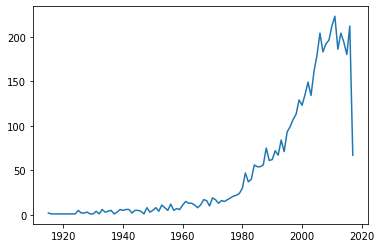

In [0]:
plt.plot(Fset.groupby('Year')['Class_Gao'].count())

In [0]:
Fset_clean=Fset.drop(['genres', 'id', 'original_title', 'overview', 'popularity',
       'release_date', 'revenue','cast','Rep_Genre', 'Genre', 'vote_average', 'vote_count','dir'],axis=1)

In [0]:
Fset_clean.columns

Index(['budget', 'ROI', 'Profit', 'Year', 'Dir Total Gross', 'Dir Avg Gross',
       'Dir Avg Rating', 'Director Total Profit', 'Director Avg Profit',
       'Director Top Profit', 'Cast Total Rev', 'Cast Mean Rev',
       'Cast Mean Avg Rev', 'Total Tenure', 'Average Tenure',
       'Cast Total Proft', 'Cast total Avg Profit', 'Cast Avg Profit',
       'Cast Top Profit', 'Cast top avg profit', 'Cast Avg Rating',
       'Cast ADC Freq', 'Cast ADC Profit', 'Cast ADC Rating',
       'Cast Mean top Profit ', 'Full Cast Mean Rev', 'Cast Total Members',
       'Cast Mean No Movies ', 'Cast Total Movies', 'Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western',
       'Month', 'Day', 'Season', 'AGE', 'CastNovelty', 'AvgAnnualProfit',
       'APPG', 'AWPG', 'Competition', 'APPG_ROI', 'APPG_Profit', 'AWPG_Pro

In [0]:
Y_Gao=Fset.Class_Gao
Y_Gao=Y_Gao.replace('Hit',1)
Y_Gao=Y_Gao.replace('Failure',0)

X_Gao=Fset_clean[['Cast Total Rev', 'Cast Total Proft','Cast Mean Rev','Cast total Avg Profit',
                  'Total Tenure','Cast Mean Avg Rev', 'Average Tenure','Day','Year' ,'Season',
       'Cast Top Profit','Cast top avg profit','Cast Avg Profit','Cast Avg Rating',
       'Dir Total Gross','Dir Avg Gross','Director Avg Profit','Dir Avg Rating',
       'Cast ADC Freq', 'Cast ADC Profit', 'Cast ADC Rating','plot_topic_15',
       'Action', 'Adventure','Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']]#, 'Gross_all', 'Gross_true',     'Gross_genre',  'ROI_true',  'ROI_all',       'Count_true', 'Count_all',  'Success_true',     'Success_all']] #Mpaa rating missig
X_Gao.shape

(5019, 42)

In [0]:
X_Gao=X_Gao.fillna(0)

In [0]:
scores=[]
clf = SVC(kernel="linear",max_iter=10000)

for i in range(1,10):
  X_train, X_test, y_train, y_test = train_test_split(X_Gao.values, Y_Gao.values, test_size=0.33)
  
  X_train=std.fit_transform(X_train)
  X_test=std.transform(X_test)

  pca = PCA(n_components=5)
  X_train=pca.fit_transform(X_train)
  X_test=pca.transform(X_test)
  
  
  clf.fit(X_train, y_train)
  
  y_pred = clf.predict(X_test)
#   print(f1_score(y_test, y_pred, average='weighted'))
  print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))
  scores.append(accuracy_score(y_test, y_pred))
print(sum(scores)/len(scores))

(0.7678616294040658, 0.7748943874471937, 0.7687683837742447, None)
(0.765571054037026, 0.7736873868436934, 0.7642112872988112, None)
(0.7882615783628615, 0.7954133977066988, 0.7869817871999597, None)
(0.7831253505187363, 0.7893783946891973, 0.7815362716596604, None)
(0.7728279991124595, 0.7809293904646952, 0.7723699482586661, None)
(0.769562026040964, 0.7767048883524442, 0.7672467171359186, None)
(0.7635006562720205, 0.7712733856366928, 0.7628611860736108, None)
(0.7757187687443535, 0.7809293904646952, 0.7704850421461251, None)
(0.7792849993874025, 0.7857573928786964, 0.7757915126315488, None)
0.7809964460537785


**Gao Work Without Rating feature.**

In [0]:
X_Gao_Minus_Rating=Fset_clean[['Cast Total Rev', 'Cast Total Proft','Cast Mean Rev','Cast total Avg Profit',
                  'Total Tenure','Cast Mean Avg Rev', 'Average Tenure','Day','Year' ,'Season',
       'Cast Top Profit','Cast top avg profit','Cast Avg Profit',
       'Dir Total Gross','Dir Avg Gross','Director Avg Profit',
       'Cast ADC Freq', 'Cast ADC Profit','plot_topic_15',
       'Action', 'Adventure','Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']]

In [0]:
scores=[]
Y_Gao=Fset.Class_Gao
Y_Gao=Y_Gao.replace('Hit',1)
Y_Gao=Y_Gao.replace('Failure',0)
clf = SVC(kernel="linear",max_iter=10000)

for i in range(1,10):
  X_train, X_test, y_train, y_test = train_test_split(X_Gao_Minus_Rating.values, Y_Gao.values, test_size=0.33)
  
  
  X_train=std.fit_transform(X_train)
  X_test=std.transform(X_test)

  pca = PCA(n_components=5)
  X_train=pca.fit_transform(X_train)
  X_test=pca.transform(X_test)
  
  
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
#   print(f1_score(y_test, y_pred, average='weighted'))
  print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))
  scores.append(accuracy_score(y_test, y_pred))
print(sum(scores)/len(scores))

(0.737796537080661, 0.7073023536511768, 0.627650625159003, None)
(0.7437682781056205, 0.6849728424864212, 0.5739836017859025, None)
(0.7042292673501706, 0.7223898611949306, 0.6704666240638318, None)
(0.7105162730289732, 0.7139408569704285, 0.6311648663514781, None)
(0.7004357591633356, 0.7133373566686784, 0.6573369999657562, None)
(0.7083819693773156, 0.7079058539529269, 0.6394090396492573, None)
(0.6921024985267032, 0.7139408569704285, 0.6541640823055724, None)
(0.7044313465468135, 0.7054918527459264, 0.6121380147361596, None)
(0.7119955346923487, 0.7048883524441762, 0.6415847191178615, None)
0.7082411318983438


On MultiClass with MT LAsh class definition 

In [0]:
scores=[]
clf = SVC(kernel="linear",max_iter=10000)
Y_Gao=Fset.Class_Lash

Y_Gao=Y_Gao.replace('Hit',1)
Y_Gao=Y_Gao.replace('Failure',0)
Y_Gao=Y_Gao.replace('Average',2)

for i in range(1,10):
  X_train, X_test, y_train, y_test = train_test_split(X_Gao.values, Y_Gao.values, test_size=0.33)
  
  
  
  pca = PCA(n_components=5)
  X_train=pca.fit_transform(X_train)
  X_test=pca.transform(X_test)
  X_train=std.fit_transform(X_train)
  X_test=std.transform(X_test)
  
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
#   print(f1_score(y_test, y_pred, average='weighted'))
  print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))
  scores.append(accuracy_score(y_test, y_pred))
print(sum(scores)/len(scores))

(0.556935898837977, 0.5564272782136391, 0.5558447158297828, None)
(0.5757357471919149, 0.5757392878696439, 0.574406235406724, None)
(0.592274051386078, 0.5908267954133977, 0.5898181911055435, None)
(0.5670987963064376, 0.5678937839468919, 0.5672216224532899, None)
(0.5722459789705039, 0.572118286059143, 0.5716864955136509, None)
(0.5658611266397054, 0.5642727821363911, 0.5648089855838614, None)
(0.5851547942499484, 0.5847917923958962, 0.5849442332879855, None)
(0.5841201207804826, 0.5805672902836452, 0.5816832200701795, None)
(0.5660054014523638, 0.5660832830416416, 0.565786327779759, None)
0.5731911754844767


**without rating feature on multi-class**

In [0]:
scores=[]
clf = SVC(kernel="linear",max_iter=1000000)
Y_Gao=Fset.Class_Lash

for i in range(1,10):
  X_train, X_test, y_train, y_test = train_test_split(X_Gao_Minus_Rating.values, Y_Gao.values, test_size=0.33)
  
  
  
  pca = PCA(n_components=5)
  X_train=pca.fit_transform(X_train)
  X_test=pca.transform(X_test)
  X_train=std.fit_transform(X_train)
  X_test=std.transform(X_test)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
#   print(f1_score(y_test, y_pred, average='weighted'))
  print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))
  scores.append(accuracy_score(y_test, y_pred))
print(sum(scores)/len(scores))

(0.5819409160257134, 0.5817742908871455, 0.5818241313909882, None)
(0.5682593267021463, 0.5666867833433916, 0.5654378547627187, None)
(0.5481370047809091, 0.5473747736873869, 0.5461327153212834, None)
(0.5726519829223564, 0.5727217863608932, 0.5722440123237119, None)
(0.5750611132827913, 0.5715147857573929, 0.5724031450368218, None)
(0.5669141487782422, 0.5642727821363911, 0.5646415679216593, None)
(0.5880846945715731, 0.587809293904647, 0.5879166321998014, None)
(0.6069849291924587, 0.5956547978273989, 0.5980766941458106, None)
(0.5694140396163139, 0.5703077851538926, 0.5688871697905123, None)
0.5731241198953932


In [0]:
clf = RandomForestClassifier(n_estimators=200, max_depth=50,random_state=10)
Y_Gao=Fset.Class_Lash
Y_Gao=Y_Gao.replace('Hit',1)
Y_Gao=Y_Gao.replace('Failure',0)
Y_Gao=Y_Gao.replace('Average',2)

X_train, X_test, y_train, y_test = train_test_split(X_Gao_Minus_Rating.values, Y_Gao.values, test_size=0.3)

X_train=std.fit_transform(X_train)
X_test=std.transform(X_test)

pca = PCA(n_components=5)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)
  

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.48339973439575035

**Summary:**
**Benchmark 1: Gao **

1.   Gao Accuracy (Binary Class): 71 %
2.   Gao Accuracy without Rating Feature (Binary Class): 57%


1.  Gao Accuracy on Multi class full feature set= 57.21 %
2.  Accuracy  ** on Multi-Class to beat : 56.69 % **






In [0]:
col=['Cast Total Rev', 'Cast Total Proft','Cast Mean Rev','Cast total Avg Profit',
                  'Total Tenure','Cast Mean Avg Rev', 'Average Tenure','Day','Year' ,'Season',
       'Cast Top Profit','Cast top avg profit','Cast Avg Profit',
       'Dir Total Gross','Dir Avg Gross','Director Avg Profit',
       'Cast ADC Freq', 'Cast ADC Profit','plot_topic_15',
       'Action', 'Adventure','Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']

In [0]:
y_train.value_counts()

In [0]:
y_test.value_counts()

2    622
0    447
1    409
Name: Class_Lash, dtype: int64

In [0]:
#X_train, X_test, y_train, y_test = train_test_split(X_Gao_Minus_Rating.values, Y_Gao.values, test_size=0.3)

X_train=X_Gao.loc[X_Gao.Year < 2010]
X_test=X_Gao.loc[X_Gao.Year >= 2010]

y_train=Fset.loc[Fset.Year < 2010].Class_Lash
y_test=Fset.loc[Fset.Year >= 2010].Class_Lash


clf = RandomForestClassifier(n_estimators=200, max_depth=30,random_state=10)
#clf = SVC(kernel="linear",max_iter=1000000)
#clf = tree.DecisionTreeClassifier()
#clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
#clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=10)
#clf = AdaBoostClassifier(n_estimators=100,learning_rate=1.0)
#clf = GaussianNB()
#clf=LogitBoost(n_estimators=200, random_state=0)
#clf=KNeighborsClassifier(n_neighbors=5)

X_train=std.fit_transform(X_train)
X_test=std.transform(X_test)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f1_score(y_test, y_pred, average='macro'),accuracy_score(y_test, y_pred),multiclass_roc_auc_score(y_test, y_pred))


0.8871591218420946 0.8863328822733424 0.9107391392954328


In [0]:
#Train test split based on Time series
start_year=1990
acc=[]
f1=[]
for i in range(6):
  
  end_year=start_year+5
  if (i==5):
    end_year=2019
    #Train test split based on Time series
  X_train=X_Gao.loc[X_Gao.Year < start_year]
  X_test=X_Gao.loc[(X_Gao.Year >= start_year) & (X_Gao.Year <end_year)]

  y_train=Fset.loc[Fset_clean.Year < start_year].Class_Lash
  y_test=Fset.loc[(Fset_clean.Year >= start_year) & (Fset_clean.Year <end_year)].Class_Lash
  
  #clf = RandomForestClassifier(n_estimators=200, max_depth=30,random_state=10)
  #clf = SVC(kernel="linear",max_iter=1000000)
  #clf = tree.DecisionTreeClassifier()
  #clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
  clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
  #clf = AdaBoostClassifier(n_estimators=100,learning_rate=1.0)
  #clf = GaussianNB()
  #clf=LogitBoost(n_estimators=200, random_state=0)
  #clf=KNeighborsClassifier(n_neighbors=5)
  

  clf1 = RandomForestClassifier(n_estimators=200, max_depth=30,random_state=10)
  clf2 = SVC(kernel="linear",max_iter=1000000,probability=True)
  clf3 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
  clf4 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
  clf5 = xgb.XGBClassifier(objective ='reg:linear',  learning_rate = 0.06,max_depth = 10, alpha = 10, n_estimators = 100)

  #clf = VotingClassifier(estimators=[('xgb', clf5), ('rf', clf1), ('svm', clf2),('gdb', clf4),('mlp',clf3)], voting='soft')
  
  
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(f1_score(y_test, y_pred, average='macro'),accuracy_score(y_test, y_pred),multiclass_roc_auc_score(y_test, y_pred))
  acc.append(accuracy_score(y_test, y_pred))
  f1.append(f1_score(y_test, y_pred, average='macro'))
  if(i!=4):
    start_year=end_year


0.8407475654250991 0.8426966292134831 0.8822236452684059
0.7518599018599019 0.7634011090573013 0.8293989715925744
0.8423249715832463 0.8504273504273504 0.8779137031559276
0.8354517589067312 0.8490566037735849 0.8762223046898076
0.8254594751460781 0.8263002944062807 0.8662754465551377
0.8433345780059831 0.8410013531799729 0.8795152357144179


In [0]:
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))


(0.8629245802110562, 0.8606224627875507, 0.8602001067779087, None)


In [0]:
all_acc.append(acc)


In [0]:
all_acc_b.append(acc)
all_f1_b.append(f1)

NameError: ignored

# Benchmark 2: MT Lash

In [0]:
X_Lash=Fset.drop(['budget','Dir Avg Rating','genres','Profit',  'Cast Avg Rating','Cast ADC Rating','id', 'original_title', 'overview', 'popularity',
       'release_date', 'revenue','cast','Rep_Genre', 'Genre', 'vote_average', 'vote_count','dir','APPG_Profit', 'APPG_ROI', 'AWPG_ROI',
       'AWPG_Profit', 'Gross_all', 'Gross_true', 'Gross_genre', 'Gross_Pred',
       'ROI_true', 'ROI_Pred', 'ROI_all', 'Count_Pred', 'Count_true',
       'Count_all', 'Success_Pred', 'Success_true', 'Success_all','Month', 'Day', 'Full Cast Mean Rev', 'Cast Total Members',
       'Cast Mean No Movies ', 'Cast Total Movies','ROI','plot_topic_15','Class_Lash','Class_Gao','Year','budget_movie'],axis=1)
Y_Lash=Fset.Class_Lash
Y_Lash=Y_Lash.replace('Hit',1)
Y_Lash=Y_Lash.replace('Failure',0)
Y_Lash=Y_Lash.replace('Average',2)

In [0]:
clf = RandomForestClassifier(n_estimators=200, max_depth=50,random_state=10)

X_Lash=X_Lash.fillna(0)
X_train, X_test, y_train, y_test = train_test_split(X_Lash.values, Y_Lash.values, test_size=0.3)

X_train=std.fit_transform(X_train)
X_test=std.transform(X_test)




clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8432934926958832

In [0]:
f1_score(y_test, y_pred, average='macro')

0.819653253208971

In [0]:
on full feature vector: 81 % 
in Paper claim: 73 %

In [0]:
X_Lash.shape

(5019, 48)

In [0]:
Fset.columns

Index(['budget', 'genres', 'id', 'original_title', 'overview', 'popularity',
       'release_date', 'revenue', 'vote_average', 'vote_count',
       ...
       'Count_all_y', 'Success_Pred_y', 'Success_true_y', 'Success_all_y',
       'Budget_all', 'Budget_movie', 'Budget_true', 'Budget_Pred',
       'Class_Lash', 'Class_Gao'],
      dtype='object', length=123)

In [0]:
Fset.head(1)

,budget,genres,id,original_title,overview,popularity,release_date,revenue,vote_average,vote_count,ROI,cast,Profit,Year,dir,Dir Total Gross,Dir Avg Gross,Dir Avg Rating,Director Total Profit,Director Avg Profit,Director Top Profit,Cast Total Rev,Cast Mean Rev,Cast Mean Avg Rev,Total Tenure,Average Tenure,Cast Total Proft,Cast total Avg Profit,Cast Avg Profit,Cast Top Profit,Cast top avg profit,Cast Avg Rating,Cast ADC Freq,Cast ADC Profit,Cast ADC Rating,Cast Mean top Profit,Full Cast Mean Rev,Cast Total Members,Cast Mean No Movies,Cast Total Movies,...,Count_true_x,Count_all_x,Success_Pred_x,Success_true_x,Success_all_x,plot_topic_15,plot_topic,actor1rating,actor1experience,actor1score,actor2rating,actor2experience,actor2score,actor3rating,actor3experience,actor3score,Director_Rating,First_Genre,Genre_Score,Director_Experience,WAGE,Gross_all_y,Gross_true_y,Gross_genre_y,Gross_Pred_y,ROI_true_y,ROI_Pred_y,ROI_all_y,Count_Pred_y,Count_true_y,Count_all_y,Success_Pred_y,Success_true_y,Success_all_y,Budget_all,Budget_movie,Budget_true,Budget_Pred,Class_Lash,Class_Gao
0,30000000.0,"['Animation', 'Comedy', 'Family']",862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,7.7,5415.0,11.451801,"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",343554033.0,1995,John Lasseter,2.256015e+09,451203061.2,6.84,1.696015e+09,339203061.2,407366869.0,4.403574e+10,3.387365e+09,2.778921e+08,324.326988,24.94823,3.368970e+10,2.832560e+09,2.178892e+08,866969703.0,4.066577e+08,6.723986,28,3.635916e+08,7.449231,715736087.0,3.387365e+09,13,12.461538,162,...,0.071429,28.0,NaN,0.1,10.0,11,25,277.1,41,9.790172e+09,74.2,12,3.051470e+09,44.5,6,2.097375e+09,34.2,Animation,3.404242e+10,5.0,1662.504469,178317598.5,0.058334,10320195.0,NaN,-0.245946,NaN,-9.78867,NaN,0.112637,27.0,NaN,0.140909,10.5,1.007175e+09,127500000.0,0.12248,NaN,1,1


In [0]:
X_Lash.columns

Index(['Year', 'Dir Total Gross', 'Dir Avg Gross', 'Director Total Profit',
       'Director Avg Profit', 'Director Top Profit', 'Cast Total Rev',
       'Cast Mean Rev', 'Cast Mean Avg Rev', 'Total Tenure', 'Average Tenure',
       'Cast Total Proft', 'Cast total Avg Profit', 'Cast Avg Profit',
       'Cast Top Profit', 'Cast top avg profit', 'Cast ADC Freq',
       'Cast ADC Profit', 'Cast Mean top Profit ', 'Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western',
       'Season', 'AGE', 'CastNovelty', 'AvgAnnualProfit', 'Competition',
       'APPG_Profit', 'AWPG_Profit', 'plot_topic', 'WAGE', 'Class_Lash'],
      dtype='object')

In [0]:
#Train test split based on Time series
X_Lash=Fset.drop(['budget','Dir Avg Rating','genres','Profit',  'Cast Avg Rating','Cast ADC Rating','id', 'original_title', 'overview', 'popularity',
       'release_date', 'revenue','cast','Rep_Genre', 'Genre', 'vote_average', 'vote_count','dir','APPG', 'APPG_ROI', 'AWPG_ROI',
       'AWPG', 'Gross_all_x', 'Gross_true_x', 'Gross_genre_x', 'Gross_Pred_x',
       'ROI_true_x', 'ROI_Pred_x', 'ROI_all_x', 'Count_Pred_x', 'Count_true_x',
       'Count_all_x', 'Success_Pred_x', 'Success_true_x', 'Success_all_x','Month', 'Day', 'Full Cast Mean Rev', 'Cast Total Members',
       'Cast Mean No Movies ', 'Cast Total Movies','ROI','plot_topic_15','Count_all_y', 'Success_Pred_y', 'Success_true_y', 'Success_all_y',
       'Budget_all', 'Budget_movie', 'Budget_true', 'Budget_Pred', 'actor1rating',
       'actor1experience', 'actor1score', 'actor2rating', 'actor2experience',
       'actor2score', 'actor3rating', 'actor3experience', 'actor3score',
       'Director_Rating', 'First_Genre', 'Genre_Score', 'Director_Experience', 'Gross_all_y', 'Gross_true_y', 'Gross_genre_y', 'Gross_Pred_y',
       'ROI_true_y', 'ROI_Pred_y', 'ROI_all_y', 'Count_Pred_y', 'Count_true_y', 'Class_Gao'],axis=1)
X_Lash=X_Lash.fillna(0)

X_train=X_Lash.loc[X_Lash.Year < 2010]

X_test=X_Lash.loc[X_Lash.Year >= 2010]

y_train=X_Lash.loc[X_Lash.Year < 2010].Class_Lash
y_test=X_Lash.loc[X_Lash.Year >= 2010].Class_Lash

X_train.drop(['Class_Lash','Year'],axis=1,inplace=True)
X_test.drop(['Class_Lash','Year'],axis=1,inplace=True)

clf = RandomForestClassifier(n_estimators=500, max_depth=50,random_state=10)

X_train=std.fit_transform(X_train)
X_test=std.transform(X_test)





clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

In [0]:
#clf = RandomForestClassifier(n_estimators=200, max_depth=30,random_state=10)
#clf = SVC(kernel="linear",max_iter=1000000)
#clf = tree.DecisionTreeClassifier()
#clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
#clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=10)
#clf = AdaBoostClassifier(n_estimators=100,learning_rate=1.0)
#clf = GaussianNB()
clf=LogitBoost(n_estimators=200, random_state=0)
#clf=KNeighborsClassifier(n_neighbors=5)


clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f1_score(y_test, y_pred, average='macro'),accuracy_score(y_test, y_pred),multiclass_roc_auc_score(y_test, y_pred))


0.9284100196054755 0.9269282814614344 0.9493453887909413


In [0]:
#Train test split based on Time series
start_year=1990
acc=[]
Y_Lash=X_Lash['Class_Lash']
f1=[]
for i in range(6):
  X_Lash['Class_Lash']=Y_Lash
  X_Lash=X_Lash.fillna(0)
  
  end_year=start_year+5
  if (i==5):
    end_year=2019
  X_train=X_Lash.loc[X_Lash.Year < start_year]
  X_test=X_Lash.loc[(X_Lash.Year >= start_year) & (X_Lash.Year <end_year)]

  print('\n Time Period:',start_year, end_year,"\t",X_train.shape,X_test.shape)
  y_train=X_Lash.loc[X_Lash.Year < start_year].Class_Lash
  y_test=X_Lash.loc[(X_Lash.Year >= start_year) & (X_Lash.Year <end_year)].Class_Lash

  X_train.drop(['Class_Lash','Year'],axis=1,inplace=True)
  X_test.drop(['Class_Lash','Year'],axis=1,inplace=True)

  #clf = RandomForestClassifier(n_estimators=200, max_depth=30,random_state=10)
  #clf = SVC(kernel="linear",max_iter=1000000)
  #clf = tree.DecisionTreeClassifier()
  #clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
  clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
  #clf = AdaBoostClassifier(n_estimators=100,learning_rate=1.0)
  #clf = GaussianNB()
  #clf=LogitBoost(n_estimators=200, random_state=0)
  #clf=KNeighborsClassifier(n_neighbors=5)
 

  

  clf1 = RandomForestClassifier(n_estimators=200, max_depth=30,random_state=10)
  clf2 = SVC(kernel="linear",max_iter=1000000,probability=True)
  clf3 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
  clf4 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
  clf5 = xgb.XGBClassifier(objective ='reg:linear',  learning_rate = 0.06,max_depth = 10, alpha = 10, n_estimators = 100)

  #clf = VotingClassifier(estimators=[('xgb', clf5), ('rf', clf1), ('svm', clf2),('gdb', clf4),('mlp',clf3)], voting='soft')

  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(f1_score(y_test, y_pred, average=None),accuracy_score(y_test, y_pred),multiclass_roc_auc_score(y_test, y_pred))
  acc.append(accuracy_score(y_test, y_pred))
  f1.append(f1_score(y_test, y_pred, average='macro'))
  if(i!=4):
    start_year=end_year



 Time Period: 1990 1995 	 (988, 49) (356, 49)
[0.928      0.80888889 0.75105485] 0.8314606741573034 0.8737685563945918

 Time Period: 1995 2000 	 (1344, 49) (541, 49)
[0.95064935 0.64981949 0.73333333] 0.789279112754159 0.8437922638912817

 Time Period: 2000 2005 	 (1885, 49) (702, 49)
[0.94883721 0.65317919 0.77388535] 0.7977207977207977 0.84077511005266

 Time Period: 2005 2010 	 (2587, 49) (954, 49)
[0.95846645 0.70361446 0.83275663] 0.8459119496855346 0.8725569048932261

 Time Period: 2010 2015 	 (3541, 49) (1019, 49)
[0.95974235 0.68717949 0.75721154] 0.7988223748773308 0.8511239910782278

 Time Period: 2010 2019 	 (3541, 49) (1478, 49)
[0.96127563 0.70276498 0.76694215] 0.8058186738836265 0.8563540826821106


In [0]:
print(precision_recall_fscore_support(y_test, y_pred, average='macro'))


(0.8633764217596553, 0.8522376514914868, 0.8569635755744898, None)


In [0]:

all_acc_b.append(acc)
all_f1_b.append(f1)

In [0]:
X_Lash.columns

Index(['Year', 'Dir Total Gross', 'Dir Avg Gross', 'Director Total Profit',
       'Director Avg Profit', 'Director Top Profit', 'Cast Total Rev',
       'Cast Mean Rev', 'Cast Mean Avg Rev', 'Total Tenure', 'Average Tenure',
       'Cast Total Proft', 'Cast total Avg Profit', 'Cast Avg Profit',
       'Cast Top Profit', 'Cast top avg profit', 'Cast ADC Freq',
       'Cast ADC Profit', 'Cast Mean top Profit ', 'Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western',
       'Season', 'AGE', 'CastNovelty', 'AvgAnnualProfit', 'Competition',
       'APPG_Profit', 'AWPG_Profit', 'plot_topic', 'WAGE', 'Class_Lash'],
      dtype='object')

# My contribution

In [0]:
#Mine Features

In [0]:
Mine=Fset.drop(['Dir Avg Rating','genres','Profit',  'Cast Avg Rating','id', 'original_title', 'overview', 'popularity',
       'release_date', 'revenue','cast','Rep_Genre', 'Genre', 'vote_average', 'vote_count','dir', 'Gross_Pred_x', 'ROI_Pred_x',  'Count_Pred_x', 
        'Success_Pred_x',  'Class_Gao','Class_Lash', 'actor1rating',
       'actor1experience', 'actor1score', 'actor2rating', 'actor2experience',
       'actor2score', 'actor3rating', 'actor3experience', 'actor3score',
       'Director_Rating', 'First_Genre', 'Genre_Score', 'Gross_all_x', 'Gross_true_x', 'Gross_genre_x',
       'ROI_true_x', 'ROI_all_x', 'Count_true_x', 'Count_all_x',
       'Success_true_x', 'Success_all_x', 'plot_topic_15','Director_Experience'],axis=1)
#'Cast ADC Rating'
Y_Lash=Fset.Class_Lash

In [0]:
Mine['bud_Share']=Mine.budget*Mine.Budget_true

In [0]:
Mine['SM']=(Mine.Success_true_y* Mine.Success_all_y) #*(Mine.Success_true* Mine.Success_all)
Mine['CM']=(Mine.Count_true_y* Mine.Count_all_y) #*(Mine.Count_true* Mine.Count_all)
Mine['RM']=(Mine.ROI_true_y* Mine.ROI_all_y) #*(Mine.ROI_true* Mine.ROI_all))

dev_phase = Mine[['Year','plot_topic','Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music',
       'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War',
       'Western','budget','bud_Share','Gross_genre_y', 'Budget_true','Gross_true_y','Count_true_y','Success_true_y']]
       #'Gross_all_y', 'Gross_true_y', 'Gross_genre_y','ROI_true_y',  'ROI_all_y',  'Count_true_y','Count_all_y', 'Success_true_y', 'Success_all_y']]

In [0]:
dev_phase_basic=dev_phase[['plot_topic','Year','Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music',
       'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War',
       'Western']]

In [0]:
clf = RandomForestClassifier(n_estimators=500, max_depth=50,random_state=10)
#clf = SVC(kernel="linear",max_iter=1000000)
clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=1, random_state=0)

Mine=Mine.fillna(0)
X_train, X_test, y_train, y_test = train_test_split(dev_phase_basic, Y_Lash.values, test_size=0.3)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Dev benchmark: ",accuracy_score(y_test, y_pred))

Accuracy Dev benchmark:  0.450199203187251


In [0]:
y_pred = clf.predict(X_train[1000:2000])
print("Accuracy Dev benchmark: ",accuracy_score(y_train[1000:2000], y_pred))

Accuracy Dev benchmark:  0.411


In [0]:
clf = RandomForestClassifier(n_estimators=500, max_depth=50,random_state=10)
#clf = SVC(kernel="linear",max_iter=1000000)
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

dev_phase=dev_phase.fillna(0)
X_train, X_test, y_train, y_test = train_test_split(dev_phase.values, Y_Lash.values, test_size=0.3)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Dev: ",accuracy_score(y_test, y_pred))

Accuracy Dev:  0.45219123505976094


In [0]:
#Train test split based on Time series
start_year=1990
acc=[]
f1=[]
#all_acc=[]
#all_f1=[]
Y_Lash=Fset.Class_Lash

for i in range(6):
  X_Lash=dev_phase
  X_Lash['Class_Lash']=Y_Lash
  X_Lash=X_Lash.fillna(0)
  
  end_year=start_year+5
  if (i==5):
    end_year=2019
  X_train=X_Lash.loc[X_Lash.Year < start_year]
  X_test=X_Lash.loc[(X_Lash.Year >= start_year) & (X_Lash.Year <end_year)]

  print('\n Time Period:',start_year, end_year,"\t",X_train.shape,X_test.shape)
  y_train=X_Lash.loc[X_Lash.Year < start_year].Class_Lash
  y_test=X_Lash.loc[(X_Lash.Year >= start_year) & (X_Lash.Year <end_year)].Class_Lash

  X_train.drop(['Class_Lash','Year'],axis=1,inplace=True)
  X_test.drop(['Class_Lash','Year'],axis=1,inplace=True)

  clf = RandomForestClassifier(n_estimators=200, max_depth=30,random_state=10)
  clf2 = SVC(kernel="linear",max_iter=1000000,probability=True)
  #clf = tree.DecisionTreeClassifier()
  #clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

  clf = GradientBoostingClassifier(n_estimators=30, learning_rate=0.1, max_depth=3, random_state=0)
  
  X_train=std.fit_transform(X_train)
  X_test=std.transform(X_test)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(f1_score(y_test, y_pred, average=None),accuracy_score(y_test, y_pred),multiclass_roc_auc_score(y_test, y_pred))
  #print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))
  acc.append(accuracy_score(y_test, y_pred))
  f1.append(f1_score(y_test, y_pred, average='macro'))
  if(i!=4):
    start_year=end_year
#all_acc.append(acc)
#all_f1.append(f1)


 Time Period: 1990 1995 	 (988, 30) (356, 30)
[0.25242718 0.35164835 0.30042918] 0.3061797752808989 0.48522566615870505

 Time Period: 1995 2000 	 (1344, 30) (541, 30)
[0.19607843 0.36158192 0.4820296 ] 0.3752310536044362 0.5414385141786004

 Time Period: 2000 2005 	 (1885, 30) (702, 30)
[0.2835443  0.19433198 0.56167979] 0.4188034188034188 0.5231297479755385

 Time Period: 2005 2010 	 (2587, 30) (954, 30)
[0.27145709 0.14814815 0.57837838] 0.4308176100628931 0.5210081133532699

 Time Period: 2010 2015 	 (3541, 30) (1019, 30)
[0.3866171  0.19101124 0.61713287] 0.4818449460255152 0.5709115172709702

 Time Period: 2010 2019 	 (3541, 30) (1478, 30)
[0.36170213 0.18595825 0.59511032] 0.462787550744249 0.5580513705298589


In [0]:
all_acc

[[0.31179775280898875,
  0.24399260628465805,
  0.3433048433048433,
  0.3721174004192872,
  0.43473994111874387,
  0.43031123139377536],
 [0.3595505617977528,
  0.3955637707948244,
  0.4202279202279202,
  0.42138364779874216,
  0.44847890088321885,
  0.43843031123139375]]

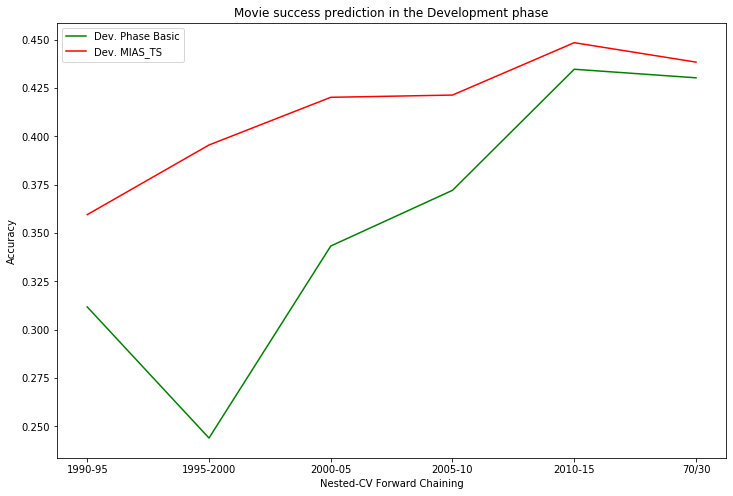

In [0]:
x=['1990-95','1995-2000','2000-05','2005-10','2010-15','70/30']
plt.figure(figsize=(12,8))
res=['Dev. Phase Basic','Dev. MIAS_TS']

colr1=['-g','-r','-g','-r']
for i in range(2):
  if(i!=6):
    plt.plot(x,all_acc[i],colr1[i],label=res[i])
    #plt.plot(x,all_f1_b[i],'-.',label=res2[i])
plt.xticks(x)
plt.xlabel("Nested-CV Forward Chaining")
plt.ylabel("Accuracy")
plt.title("Movie success prediction in the Development phase")
plt.legend()

In [0]:
Mine.shape

(5019, 68)

**Pre _production text**

In [0]:
clf = RandomForestClassifier(n_estimators=500, max_depth=100,random_state=10)
#clf = SVC(kernel="linear",max_iter=1000000)

Mine=Mine.fillna(0)
X_train, X_test, y_train, y_test = train_test_split(Mine, Y_Lash, test_size=0.3)

X_train=std.fit_transform(X_train)
X_test=std.transform(X_test)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy pre prod: ",accuracy_score(y_test, y_pred))

In [0]:
f1_score(y_test, y_pred, average='micro')

0.8718459495351926

In [0]:
X_train, X_test, y_train, y_test = train_test_split(Mine_updated, Y_Lash, test_size=0.3)
clf = RandomForestClassifier(n_estimators=200, max_depth=10,random_state=10)
#clf = SVC(kernel="linear",max_iter=1000000)
#clf = tree.DecisionTreeClassifier()
#clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
#clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
#clf = AdaBoostClassifier(n_estimators=100,learning_rate=1.0)
#clf = GaussianNB()
#clf=LogitBoost(n_estimators=200, random_state=0)
#clf=KNeighborsClassifier(n_neighbors=5)
X_train=std.fit_transform(X_train)
X_test=std.transform(X_test)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f1_score(y_test, y_pred, average=None),accuracy_score(y_test, y_pred),multiclass_roc_auc_score(y_test, y_pred))

[0.96304591 0.79086538 0.85159285] 0.8678618857901726 0.8960456918555737


In [0]:
y_pred = clf.predict(X_train[1100:1200])
print("Accuracy Dev benchmark: ",accuracy_score(y_train[1100:1200], y_pred))

Accuracy Dev benchmark:  0.96


In [0]:
all_f1=[]
all_acc=[]

In [0]:
Mine=Mine.fillna(0)

Mine_updated=Mine[[  'Year','Dir Total Gross', 'Dir Avg Gross',
       'Cast Total Rev',   'Total Tenure',
         'Cast Top Profit', 'Cast top avg profit',
       'Cast ADC Freq', 'Cast ADC Profit',  'Cast Total Members', 'Cast Mean No Movies ',
       'Cast Total Movies', 'Action', 'Adventure', 'Animation', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign',
       'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western',  'Season',
       'AGE',  'CastNovelty', 'AvgAnnualProfit', 'Competition', 'plot_topic',
       'AWPG_ROI','APPG_ROI','bud_Share','Gross_true_y','ROI_true_y','Success_true_y','Count_true_y','Budget_true','budget']]

Regressio

In [0]:
#Train test split based on Time series
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
acc=[]
f1=[]
start_year=1990
Mine.ROI /= Mine.ROI.max()
#all_acc=[]
#all_f1=[]
for i in range(6):
  X_Lash=Mine_updated
  X_Lash['Class_Lash']=Mine.ROI
  X_Lash=X_Lash.fillna(0)
  
  end_year=start_year+5
  if (i==5):
    end_year=2019
  X_train=X_Lash.loc[X_Lash.Year < start_year]
  X_test=X_Lash.loc[(X_Lash.Year >= start_year) & (X_Lash.Year <end_year)]

  print('\n Time Period:',start_year, end_year,"\t",X_train.shape,X_test.shape)
  y_train=X_Lash.loc[X_Lash.Year < start_year].Class_Lash
  y_test=X_Lash.loc[(X_Lash.Year >= start_year) & (X_Lash.Year <end_year)].Class_Lash

  X_train.drop(['Class_Lash','Year'],axis=1,inplace=True)
  X_test.drop(['Class_Lash','Year'],axis=1,inplace=True)

  clf = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)
  clf = SVR(gamma='scale', C=1.0, epsilon=0.2)
  #clf = tree.DecisionTreeClassifier()
  clf = MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
  #clf = GradientBoostingRegressor(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
  #clf = AdaBoostRegressor(random_state=0, n_estimators=100)
  

  X_train=std.fit_transform(X_train)
  X_test=std.transform(X_test)
  
  
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print( "R-squared for Train: %.2f" %clf.score(X_train, y_train))
  print ("R-squared for Test: %.2f" %clf.score(X_test, y_test) )
  print('MSE Test', mean_squared_error(y_test, y_pred))
    #print(f1_score(y_test, y_pred, average=None),accuracy_score(y_test, y_pred),multiclass_roc_auc_score(y_test, y_pred))
  #print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))
  acc.append(mean_squared_error(y_test, y_pred))
  #f1.append(f1_score(y_test, y_pred, average='macro'))
  if(i!=4):
    start_year=end_year
#all_acc.append(acc)
#all_f1.append(f1)


 Time Period: 1990 1995 	 (988, 48) (356, 48)
R-squared for Train: 0.00
R-squared for Test: -49.11
MSE Test 1.870615883315941e-05

 Time Period: 1995 2000 	 (1344, 48) (541, 48)
R-squared for Train: -0.00
R-squared for Test: 0.00
MSE Test 0.00018962979724869962

 Time Period: 2000 2005 	 (1885, 48) (702, 48)
R-squared for Train: -0.00
R-squared for Test: -0.10
MSE Test 3.789873036468227e-06

 Time Period: 2005 2010 	 (2587, 48) (954, 48)
R-squared for Train: -0.00
R-squared for Test: -0.00
MSE Test 0.0010473242754371213

 Time Period: 2010 2015 	 (3541, 48) (1019, 48)
R-squared for Train: -0.00
R-squared for Test: -1.00
MSE Test 7.066411388605405e-07

 Time Period: 2010 2019 	 (3541, 48) (1478, 48)
R-squared for Train: -0.00
R-squared for Test: -1.14
MSE Test 2.398792080452629e-06


In [0]:
all_acc.append(acc)

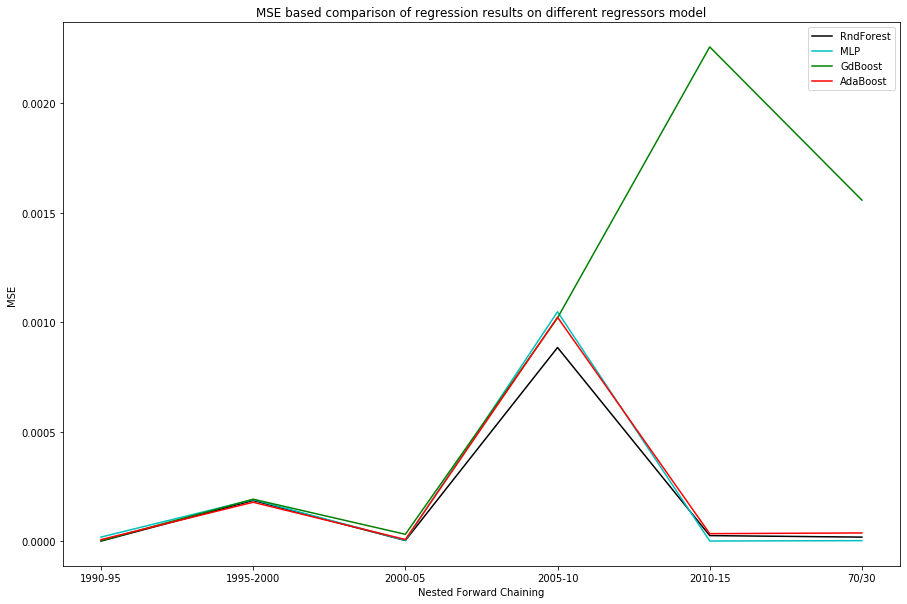

In [0]:
x=['1990-95','1995-2000','2000-05','2005-10','2010-15','70/30']
Model_name=['RndForest','MLP','GdBoost','AdaBoost','Acc. Hybrid','Acc. XGdboost','NB','LogitBoost','KNN']
Model_name1=['F1- RndForest','F1- SVM','F1- MLP','F1- GdBoost','F1- AdaBoost','F1- Hybrid','F1- XGdboost','NB','LogitBoost','KNN']

plt.figure(figsize=(15,10))
colr=['-.k','-.b','-.g','-.r','-.m','-.c','-.y']
colr1=['-k','-c','-g','-r','-m','-c','-y']
for i in range(4):
  if(i!=9):
    plt.plot(x,all_acc[i],colr1[i],label=Model_name[i])

plt.xticks(x)
plt.xlabel("Nested Forward Chaining")
plt.ylabel("MSE")
plt.title("MSE based comparison of regression results on different regressors model")
plt.legend()

Classfication


In [0]:
X_Lash.columns

Index(['Year', 'Dir Total Gross', 'Dir Avg Gross', 'Cast Total Rev',
       'Total Tenure', 'Cast Top Profit', 'Cast top avg profit',
       'Cast ADC Freq', 'Cast ADC Profit', 'Cast Total Members',
       'Cast Mean No Movies ', 'Cast Total Movies', 'Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western',
       'Season', 'AGE', 'CastNovelty', 'AvgAnnualProfit', 'Competition',
       'plot_topic', 'AWPG_ROI', 'APPG_ROI', 'bud_Share', 'Gross_true_y',
       'ROI_true_y', 'Success_true_y', 'Count_true_y', 'Budget_true', 'budget',
       'Class_Lash'],
      dtype='object')

In [0]:
#Train test split based on Time series
start_year=1990
acc=[]
f1=[]
#all_acc=[]
#all_f1=[]
for i in range(6):
  X_Lash=Mine_updated
  X_Lash['Class_Lash']=Y_Lash
  X_Lash=X_Lash.fillna(0)
  
  end_year=start_year+5
  if (i==5):
    end_year=2019
  X_train=X_Lash.loc[X_Lash.Year < start_year]
  X_test=X_Lash.loc[(X_Lash.Year >= start_year) & (X_Lash.Year <end_year)]

  print('\n Time Period:',start_year, end_year,"\t",X_train.shape,X_test.shape)
  y_train=X_Lash.loc[X_Lash.Year < start_year].Class_Lash
  y_test=X_Lash.loc[(X_Lash.Year >= start_year) & (X_Lash.Year <end_year)].Class_Lash

  X_train.drop(['Class_Lash','Year'  ],axis=1,inplace=True)
  X_test.drop(['Class_Lash','Year' ],axis=1,inplace=True)

  clf1 = RandomForestClassifier(n_estimators=200, max_depth=30,random_state=10)
  #clf = SVC(kernel="linear",max_iter=1000000,probability=True)
  #clf = tree.DecisionTreeClassifier()
  #clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
  clf = GradientBoostingClassifier(n_estimators=30, learning_rate=0.1, max_depth=5)
  #clf = AdaBoostClassifier(n_estimators=100,learning_rate=1.0)
  #clf = GaussianNB()
  #clf=LogitBoost(n_estimators=200, random_state=0)
  #clf=KNeighborsClassifier(n_neighbors=5)
  clf = xgb.XGBClassifier(objective ='reg:linear',  learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 30)
  #clf = VotingClassifier(estimators=[('xgb', clf5), ('rf', clf1), ('svm', clf2),('gdb', clf4),('mlp',clf3)], voting='soft')
  
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(f1_score(y_test, y_pred, average=None),accuracy_score(y_test, y_pred),multiclass_roc_auc_score(y_test, y_pred))
  #print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))
  acc.append(accuracy_score(y_test, y_pred))
  f1.append(f1_score(y_test, y_pred, average='macro'))
  if(i!=4):
    start_year=end_year
#all_acc.append(acc)
#all_f1.append(f1)


 Time Period: 1990 1995 	 (988, 48) (356, 48)
[0.93280632 0.87068966 0.81057269] 0.8735955056179775 0.9065781745862518

 Time Period: 1995 2000 	 (1344, 48) (541, 48)
[0.95854922 0.85393258 0.88111888] 0.9020332717190388 0.9327147275727654

 Time Period: 2000 2005 	 (1885, 48) (702, 48)
[0.97011494 0.89275362 0.91987179] 0.9287749287749287 0.9439647251192099

 Time Period: 2005 2010 	 (2587, 48) (954, 48)
[0.96474359 0.90951276 0.93317702] 0.9381551362683438 0.9510603715925908

 Time Period: 2010 2015 	 (3541, 48) (1019, 48)
[0.96103896 0.92252252 0.92733564] 0.9362119725220804 0.9519313697126809

 Time Period: 2010 2019 	 (3541, 48) (1478, 48)
[0.96559633 0.92252682 0.93172691] 0.939106901217862 0.9543637871548268


In [0]:
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
Cast ADC Profit,0.372038
budget,0.167000
Dir Total Gross,0.064884
Cast Mean No Movies,0.029325
Dir Avg Gross,0.028661
Competition,0.024513
Cast Total Rev,0.024290
Success_true_y,0.023006
Crime,0.022859
Cast Total Movies,0.020826


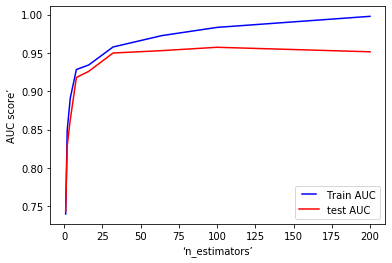

In [0]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
X_Lash=Mine_updated
X_Lash['Class_Lash']=Y_Lash
X_Lash=X_Lash.fillna(0)
train_results = []
test_results = []
x_train=X_Lash.loc[X_Lash.Year < 2010]
x_test=X_Lash.loc[(X_Lash.Year >= 2010) & (X_Lash.Year <2019)]

y_train=X_Lash.loc[X_Lash.Year < 2010].Class_Lash
y_test=X_Lash.loc[(X_Lash.Year >= 2010) & (X_Lash.Year <2019)].Class_Lash

x_train.drop(['Class_Lash','Year' ],axis=1,inplace=True)
x_test.drop(['Class_Lash','Year'],axis=1,inplace=True)

for estimator in n_estimators:
   model = GradientBoostingClassifier(n_estimators=estimator)
   model.fit(x_train, y_train)
   train_pred = model.predict(x_train)
   
   train_results.append(multiclass_roc_auc_score(y_train, train_pred))
   y_pred = model.predict(x_test)
   
   test_results.append(multiclass_roc_auc_score(y_test, y_pred))

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label="test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score’")
plt.xlabel("‘n_estimators’")
plt.show()

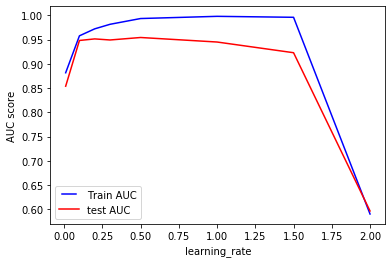

In [0]:
n_estimators = [0.01,0.1,0.2,0.3,0.5,1,1.5,2]
X_Lash=Mine_updated
X_Lash['Class_Lash']=Y_Lash
X_Lash=X_Lash.fillna(0)
train_results = []
test_results = []
x_train=X_Lash.loc[X_Lash.Year < 2010]
x_test=X_Lash.loc[(X_Lash.Year >= 2010) & (X_Lash.Year <2019)]

y_train=X_Lash.loc[X_Lash.Year < 2010].Class_Lash
y_test=X_Lash.loc[(X_Lash.Year >= 2010) & (X_Lash.Year <2019)].Class_Lash

x_train.drop(['Class_Lash','Year' ],axis=1,inplace=True)
x_test.drop(['Class_Lash','Year'],axis=1,inplace=True)

for estimator in n_estimators:
   model = GradientBoostingClassifier(n_estimators=30,learning_rate=estimator)
   model.fit(x_train, y_train)
   train_pred = model.predict(x_train)
   
   train_results.append(multiclass_roc_auc_score(y_train, train_pred))
   y_pred = model.predict(x_test)
   
   test_results.append(multiclass_roc_auc_score(y_test, y_pred))

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label="test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("learning_rate")
plt.show()

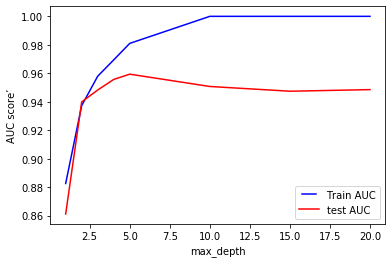

In [0]:
n_estimators = [1,2,3,4,5,10,15,20]
X_Lash=Mine_updated
X_Lash['Class_Lash']=Y_Lash
X_Lash=X_Lash.fillna(0)
train_results = []
test_results = []
x_train=X_Lash.loc[X_Lash.Year < 2010]
x_test=X_Lash.loc[(X_Lash.Year >= 2010) & (X_Lash.Year <2019)]

y_train=X_Lash.loc[X_Lash.Year < 2010].Class_Lash
y_test=X_Lash.loc[(X_Lash.Year >= 2010) & (X_Lash.Year <2019)].Class_Lash

x_train.drop(['Class_Lash','Year' ],axis=1,inplace=True)
x_test.drop(['Class_Lash','Year'],axis=1,inplace=True)

for estimator in n_estimators:
   model = GradientBoostingClassifier(n_estimators=30,learning_rate=0.1,max_depth=estimator)
   model.fit(x_train, y_train)
   train_pred = model.predict(x_train)
   
   train_results.append(multiclass_roc_auc_score(y_train, train_pred))
   y_pred = model.predict(x_test)
   
   test_results.append(multiclass_roc_auc_score(y_test, y_pred))

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label="test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score’")
plt.xlabel("max_depth")
plt.show()

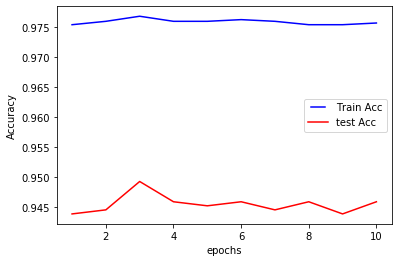

In [0]:
n_estimators = [1,2,3,4,5,6,7,8,9,10]
X_Lash=Mine_updated
X_Lash['Class_Lash']=Y_Lash
X_Lash=X_Lash.fillna(0)
train_results = []
test_results = []
x_train=X_Lash.loc[X_Lash.Year < 2010]
x_test=X_Lash.loc[(X_Lash.Year >= 2010) & (X_Lash.Year <2019)]

y_train=X_Lash.loc[X_Lash.Year < 2010].Class_Lash
y_test=X_Lash.loc[(X_Lash.Year >= 2010) & (X_Lash.Year <2019)].Class_Lash

x_train.drop(['Class_Lash','Year' ],axis=1,inplace=True)
x_test.drop(['Class_Lash','Year'],axis=1,inplace=True)

for estimator in n_estimators:
   model = GradientBoostingClassifier(n_estimators=30,learning_rate=0.1,max_depth=5)
   model.fit(x_train, y_train)
   train_pred = model.predict(x_train)
   
   train_results.append(accuracy_score(y_train, train_pred))
   y_pred = model.predict(x_test)
   
   test_results.append(accuracy_score(y_test, y_pred))

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train Acc')
line2, = plt.plot(n_estimators, test_results, 'r', label="test Acc")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Accuracy")
plt.xlabel("epochs")
plt.show()

In [0]:
#budget,gros,roi,'Success_true_y',count,Budget_true, overall
feature_1_vs_all=[  [0.7949438202247191,
  0.8391866913123844,
  0.8632478632478633,
  0.8920335429769392,
  0.858684985279686,
  0.86468200270636],

  [0.8117977528089888,
  0.8391866913123844,
  0.8646723646723646,
  0.8983228511530398,
  0.8704612365063789,
  0.8721244925575101],

 [0.8230337078651685,
  0.8502772643253235,
  0.8660968660968661,
  0.9035639412997903,
  0.8832188420019627,
  0.8843031123139378],

 [0.797752808988764,
  0.844731977818854,
  0.8575498575498576,
  0.9035639412997903,
  0.8832188420019627,
  0.8843031123139378],

  [0.797752808988764,
  0.8558225508317929,
  0.8646723646723646,
  0.89937106918239,
  0.8832188420019627,
  0.8856562922868741],

  [0.797752808988764,
  0.8521256931608133,
  0.8646723646723646,
  0.9067085953878407,
  0.887144259077527,
  0.8870094722598105],

 [0.8623595505617978,
  0.8724584103512015,
  0.9102564102564102,
  0.9161425576519916,
  0.9205103042198234,
  0.9228687415426252]]

6


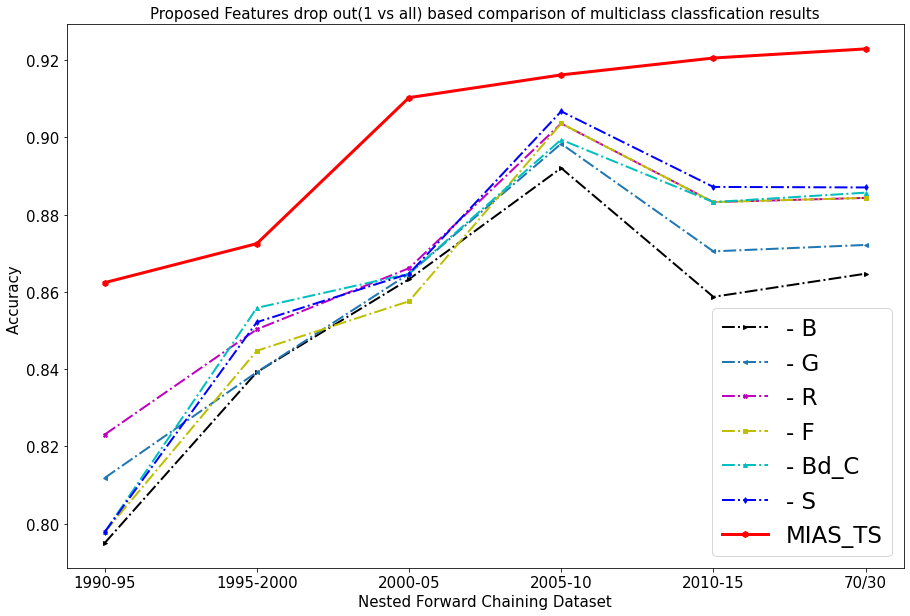

In [0]:
x=['1990-95','1995-2000','2000-05','2005-10','2010-15','70/30']
#Model_name=['MIAS_TS','- bd','- B','- S','- R','- G','- C']
Model_name=['- B','- G','- R','- F','- Bd_C','- S','MIAS_TS','Lash','Gao']
mar=['>','<','X','s','^','d','h','P','8','P']
#Model_name=['- Bd_C','-B','-C,B','-S,C,B','-R,S,C,B','-G,R,S,C,B','MIAS_TS','Lash','Gao']
plt.figure(figsize=(15,10))
colr=['-.k','-.o','-.m','-.y','-.c','-.b','-.k','-k','-g']
colr1=['-k','-b','-g','-r','-m','-y','-r','peru','-k']
feature_dropout=feature_1_vs_all
for i in range(7):
  
  if((i<6)):
    plt.plot(x,feature_dropout[i],colr[i],label=Model_name[i],linewidth=2,marker=mar[i],markersize=4)
  else:
    print(i)
    plt.plot(x,feature_dropout[i],colr1[i],label=Model_name[i],linewidth=3,marker=mar[i],markersize=6)

plt.yticks(fontsize=15) 
plt.xticks(x,fontsize=15)
plt.xlabel("Nested Forward Chaining Dataset",fontsize=15)
plt.ylabel("Accuracy ",fontsize=15)
plt.title("Proposed Features drop out(1 vs all) based comparison of multiclass classfication results",fontsize=15)
#plt.title("Proposed Features Drop-Out based comparison of multiclass classfication results",fontsize=15)

plt.legend(prop={'size': 23})


6


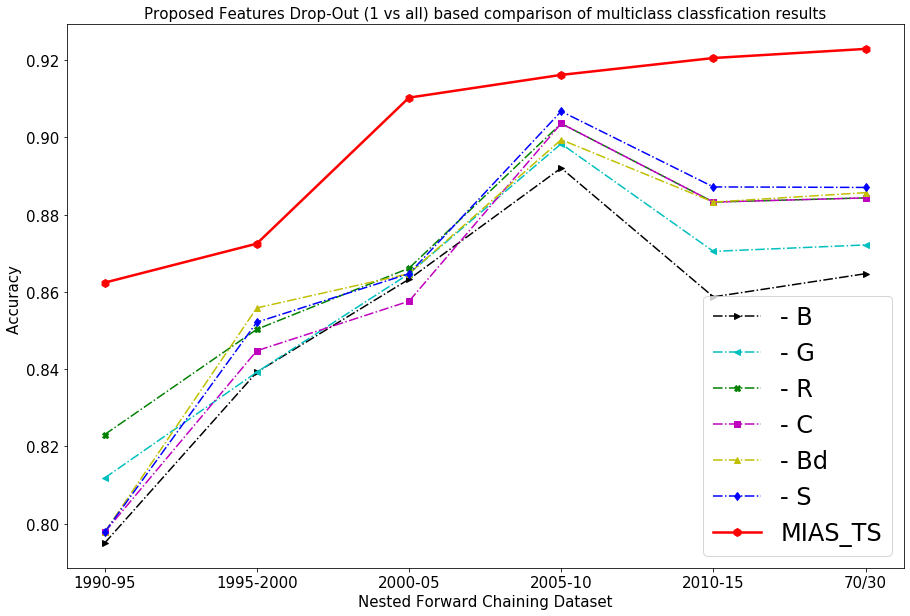

In [0]:
feature_dropout=[[0.797752808988764,
  0.8558225508317929,
  0.8646723646723646,
  0.89937106918239,
  0.8832188420019627,
  0.8856562922868741],
  [0.7949438202247191,
  0.8391866913123844,
  0.8632478632478633,
  0.8920335429769392,
  0.858684985279686,
  0.86468200270636],
 [0.8033707865168539,
  0.8243992606284658,
  0.8675213675213675,
  0.8878406708595388,
  0.8567222767419038,
  0.8592692828146143],
 [0.8033707865168539,
  0.8428835489833642,
  0.8689458689458689,
  0.8867924528301887,
  0.8557409224730128,
  0.8572395128552097],
 [0.7921348314606742,
  0.8354898336414048,
  0.8632478632478633,
  0.8752620545073375,
  0.8400392541707556,
  0.8443843031123139],
 [0.8117977528089888,
  0.8299445471349353,
  0.8304843304843305,
  0.8668763102725366,
  0.8410206084396468,
  0.8457374830852503],
 [0.8623595505617978,
  0.8724584103512015,
  0.9102564102564102,
  0.9161425576519916,
  0.9205103042198234,
  0.9228687415426252],
 [0.8314606741573034,
  0.789279112754159,
  0.7977207977207977,
  0.8459119496855346,
  0.7988223748773308,
  0.8058186738836265],
 [0.8426966292134831,
  0.7634011090573013,
  0.8504273504273504,
  0.8490566037735849,
  0.8263002944062807,
  0.8410013531799729]]

In [0]:
len(all_acc)

6
7
8


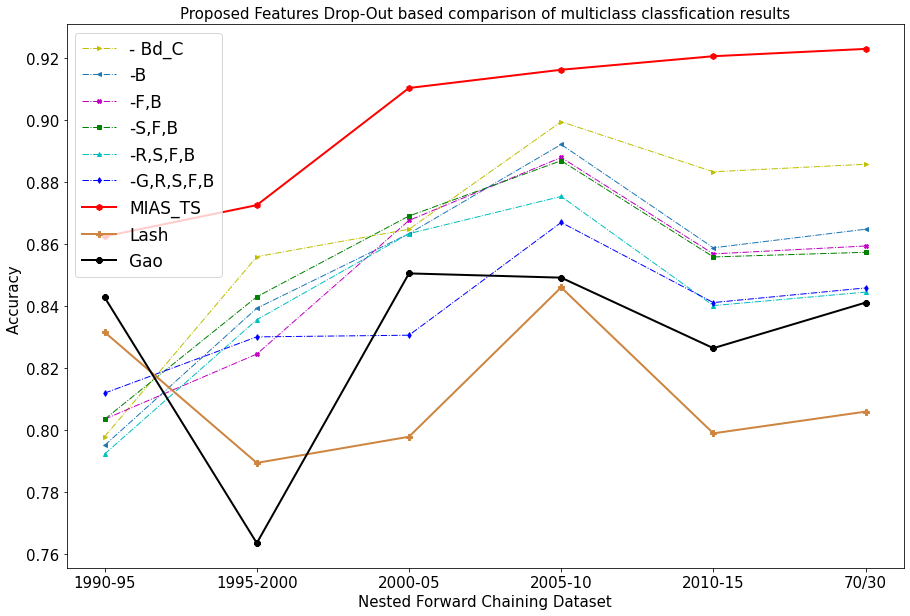

In [0]:
x=['1990-95','1995-2000','2000-05','2005-10','2010-15','70/30']
#Model_name=['MIAS_TS','- bd','- B','- S','- R','- G','- C']
#Model_name=['- bd','- B','- S','- R','- G','MIAS_TS','- C','Lash','Gao']
mar=['>','<','X','s','^','d','h','P','8','P']
Model_name=['- Bd_C','-B','-F,B','-S,F,B','-R,S,F,B','-G,R,S,F,B','MIAS_TS','Lash','Gao']
plt.figure(figsize=(15,10))
colr=['-.y','-.o','-.m','-.g','-.c','-.b','-.k','-k','-g']
colr1=['-k','-b','-g','-r','-m','-y','-r','peru','-k']
for i in range(9):
  
  if((i<6)):
    plt.plot(x,feature_dropout[i],colr[i],label=Model_name[i],linewidth=1,marker=mar[i],markersize=4)
  else:
    print(i)
    plt.plot(x,feature_dropout[i],colr1[i],label=Model_name[i],linewidth=2,marker=mar[i],markersize=6)

plt.yticks(fontsize=15) 
plt.xticks(x,fontsize=15)
plt.xlabel("Nested Forward Chaining Dataset",fontsize=15)
plt.ylabel("Accuracy ",fontsize=15)
#plt.title("Proposed Features drop out(1 vs all) based comparison of multiclass classfication results",fontsize=15)
plt.title("Proposed Features Drop-Out based comparison of multiclass classfication results",fontsize=15)

plt.legend(prop={'size': 17})


In [0]:
all_acc

[[0.7949438202247191,
  0.8391866913123844,
  0.8632478632478633,
  0.8920335429769392,
  0.858684985279686,
  0.86468200270636],
 [0.8033707865168539,
  0.8243992606284658,
  0.8675213675213675,
  0.8878406708595388,
  0.8567222767419038,
  0.8592692828146143],
 [0.8033707865168539,
  0.8428835489833642,
  0.8689458689458689,
  0.8867924528301887,
  0.8557409224730128,
  0.8572395128552097],
 [0.7921348314606742,
  0.8354898336414048,
  0.8632478632478633,
  0.8752620545073375,
  0.8400392541707556,
  0.8443843031123139],
 [0.8117977528089888,
  0.8299445471349353,
  0.8304843304843305,
  0.8668763102725366,
  0.8410206084396468,
  0.8457374830852503],
 [0.8623595505617978,
  0.8724584103512015,
  0.9102564102564102,
  0.9161425576519916,
  0.9205103042198234,
  0.9228687415426252],
 [0.797752808988764,
  0.8558225508317929,
  0.8646723646723646,
  0.89937106918239,
  0.8832188420019627,
  0.8856562922868741],
 [0.8314606741573034,
  0.789279112754159,
  0.7977207977207977,
  0.845911

In [0]:
xgb.plot_importance(clf)
plt.figure(figsize=(5,7))
#plt.rcParams['figure.figsize'] = [25, 15]
plt.show()

In [0]:
print(precision_recall_fscore_support(y_test, y_pred, average='macro'))


(0.9477812768560057, 0.950422063207235, 0.948585276718375, None)


In [0]:
all_acc_b.append(acc)
all_f1_b.append(f1)

# Plots

In [0]:
all_f1_b

[[0.36943101250114424,
  0.40635246621028615,
  0.4454872810009043,
  0.5277218282709321,
  0.5686477695812617,
  0.5627345092036989],
 [0.8407475654250991,
  0.7518599018599019,
  0.8423249715832463,
  0.8354517589067312,
  0.8254594751460781,
  0.8433345780059831],
 [0.829314580403188,
  0.7779340595225072,
  0.7919672501240808,
  0.8316125145233458,
  0.8013777922292414,
  0.8103275840475153],
 [0.8726287724331784,
  0.8563456731972082,
  0.9055732178476928,
  0.9130016443193733,
  0.9211619670440475,
  0.9261486262468965]]

In [0]:
all_acc_b

[[0.4044943820224719,
  0.4048059149722736,
  0.4544159544159544,
  0.5324947589098532,
  0.5760549558390579,
  0.56765899864682],
 [0.8426966292134831,
  0.7634011090573013,
  0.8504273504273504,
  0.8490566037735849,
  0.8263002944062807,
  0.8410013531799729],
 [0.8314606741573034,
  0.789279112754159,
  0.7977207977207977,
  0.8459119496855346,
  0.7988223748773308,
  0.8058186738836265],
 [0.8735955056179775,
  0.866913123844732,
  0.9088319088319088,
  0.9171907756813418,
  0.9205103042198234,
  0.9248985115020297]]

In [0]:
Model_Comparison_results=[[0.4044943820224719,
  0.4048059149722736,
  0.4544159544159544,
  0.5324947589098532,
  0.5760549558390579,
  0.56765899864682],
 [0.8426966292134831,
  0.7634011090573013,
  0.8504273504273504,
  0.8490566037735849,
  0.8263002944062807,
  0.8410013531799729],
 [0.8314606741573034,
  0.789279112754159,
  0.7977207977207977,
  0.8459119496855346,
  0.7988223748773308,
  0.8058186738836265],
 [0.8735955056179775,
  0.866913123844732,
  0.9088319088319088,
  0.9171907756813418,
  0.9205103042198234,
  0.9248985115020297]]

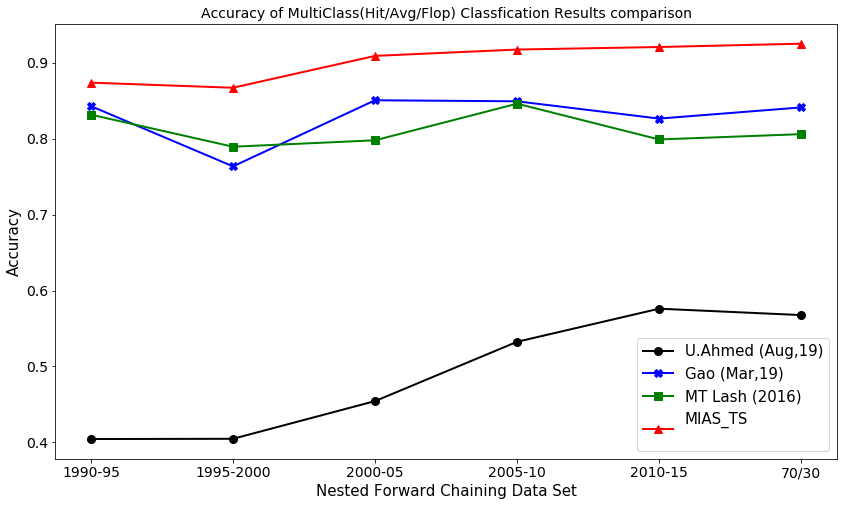

In [0]:
x=['1990-95','1995-2000','2000-05','2005-10','2010-15','70/30']
plt.figure(figsize=(14,8))
res=['U.Ahmed (Aug,19)','Gao (Mar,19)','MT Lash (2016)','MIAS_TS\n']
res2=['F1- U.Ahmed (Aug,19)','F1- Gao (Mar,2019)','F1 - MT Lash (2016)','F1- MIAS_TS']
colr=['-.k','-.b','-.g','-.r']
colr1=['-k','-b','-g','-r']
mar=['o','X','s','^']
for i in range(0,4):
  if(i!=6):
    plt.plot(x,all_acc_b[i],colr1[i],label=res[i],linewidth=2,marker=mar[i],markersize=8)
    #plt.plot(x,all_f1_b[i],'-.',label=res2[i])
for i in range(1,4):
  if(i!=6):
    print()
    #plt.plot(x,all_f1_b[i],colr[i],label=res2[i])
plt.xticks(x,fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel("Nested Forward Chaining Data Set",fontsize=15)
plt.ylabel("Accuracy",fontsize=15)
plt.title("Accuracy of MultiClass(Hit/Avg/Flop) Classfication Results comparison",fontsize=14)
plt.legend(fontsize=15)

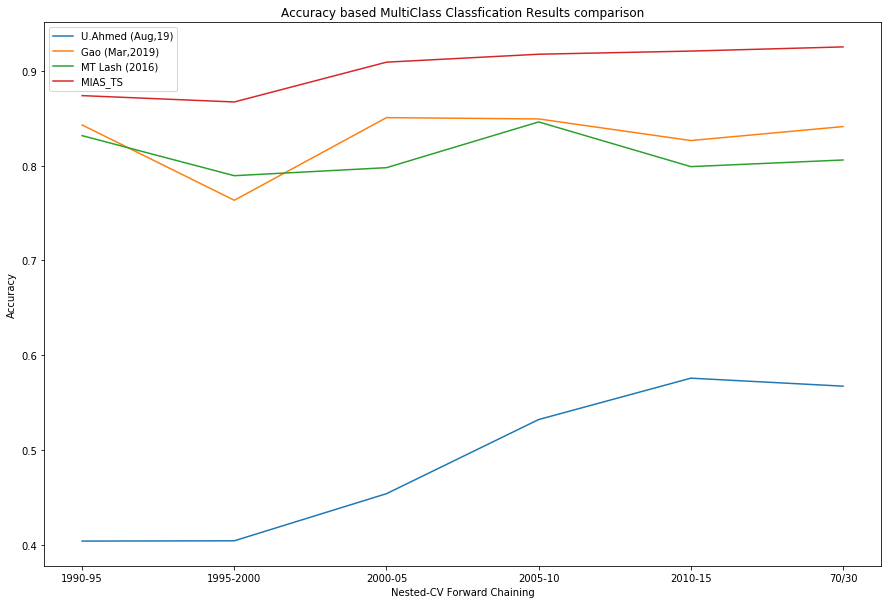

In [0]:
x=['1990-95','1995-2000','2000-05','2005-10','2010-15','70/30']
plt.figure(figsize=(15,10))
res=['U.Ahmed (Aug,19)','Gao (Mar,2019)','MT Lash (2016)','MIAS_TS']
#res=['F1 U.Ahmed (Aug,19)','F1- Gao (Mar,2019)','F1 - MT Lash (2016)','F1- MIAS_TS']
for i in range(4):
  if(i!=6):
    plt.plot(x,all_acc_b[i],label=res[i])
    #plt.plot(x,all_f1_b[i],'-.',label=res[i])
plt.xticks(x)
plt.xlabel("Nested-CV Forward Chaining")
plt.ylabel("Accuracy")
plt.title("Accuracy based MultiClass Classfication Results comparison")
plt.legend()

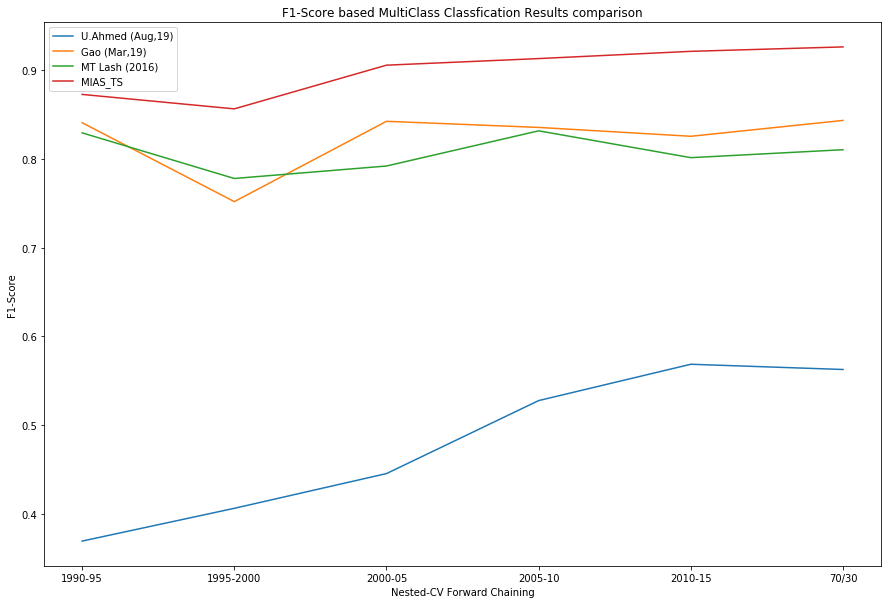

In [0]:
x=['1990-95','1995-2000','2000-05','2005-10','2010-15','70/30']
plt.figure(figsize=(15,10))
res=['U.Ahmed (Aug,19)','Gao (Mar,19)','MT Lash (2016)','MIAS_TS']
for i in range(4):
  if(i!=6):
    plt.plot(x,all_f1_b[i],label=res[i])
    
plt.xticks(x)
plt.xlabel("Nested-CV Forward Chaining")
plt.ylabel("F1-Score")
plt.title("F1-Score based MultiClass Classfication Results comparison")
plt.legend()

In [0]:
all_f1

[[0.8557057693161739,
  0.8205356636426834,
  0.8644801042702092,
  0.8667254538475401,
  0.873542595306077,
  0.8783279564702576],
 [0.8543832957008523,
  0.8572847421181305,
  0.8832328271249379,
  0.8835973631634126,
  0.8879191020131207,
  0.8937801307013098],
 [0.7213379004229976,
  0.8207151291081024,
  0.890405405940163,
  0.883053587428623,
  0.9065925801246086,
  0.9059845585010463],
 [0.8726287724331784,
  0.8563456731972082,
  0.9055732178476928,
  0.9130016443193733,
  0.9211619670440475,
  0.9261486262468965],
 [0.6788301886792453,
  0.7514227177289389,
  0.7308301920890156,
  0.8172555438743566,
  0.8023438434589422,
  0.8004978981776897]]

In [0]:
x=['1990-95','1995-2000','2000-05','2005-10','2010-15','70/30']
Model_name=['Acc. RndForest','Acc. SVM','Acc. MLP','Acc. GdBoost','Acc. AdaBoost','Acc. Hybrid','Acc. XGdboost','NB','LogitBoost','KNN']
Model_name1=['F1- RndForest','F1- SVM','F1- MLP','F1- GdBoost','F1- AdaBoost','F1- Hybrid','F1- XGdboost','NB','LogitBoost','KNN']

plt.figure(figsize=(15,10))
colr=['-.k','-.b','-.g','-.r','-.m','-.c','-.y']
colr1=['-k','-b','-g','-r','-m','-c','-y']
for i in range(7):
  if(i!=9):
    plt.plot(x,all_acc[i],colr1[i],label=Model_name[i])
for i in range(7):
  if(i!=9):
    plt.plot(x,all_f1[i],colr[i],label=Model_name1[i])
plt.xticks(x)
plt.xlabel("Nested Forward Chaining")
plt.ylabel("Accuracy and F1-Score")
plt.title("Accuracy and F1 based comparison of multiclass classfication results on different classfication model")
plt.legend()

In [0]:
all_f1=[[0.8557057693161739,
  0.8205356636426834,
  0.8644801042702092,
  0.8667254538475401,
  0.873542595306077,
  0.8783279564702576],
 [0.8543832957008523,
  0.8572847421181305,
  0.8832328271249379,
  0.8835973631634126,
  0.8879191020131207,
  0.8937801307013098],
 [0.7213379004229976,
  0.8207151291081024,
  0.890405405940163,
  0.883053587428623,
  0.9065925801246086,
  0.9059845585010463],
 [0.8726287724331784,
  0.8563456731972082,
  0.9055732178476928,
  0.9130016443193733,
  0.9211619670440475,
  0.9261486262468965],
 [0.6788301886792453,
  0.7514227177289389,
  0.7308301920890156,
  0.8172555438743566,
  0.8023438434589422,
  0.8004978981776897]]

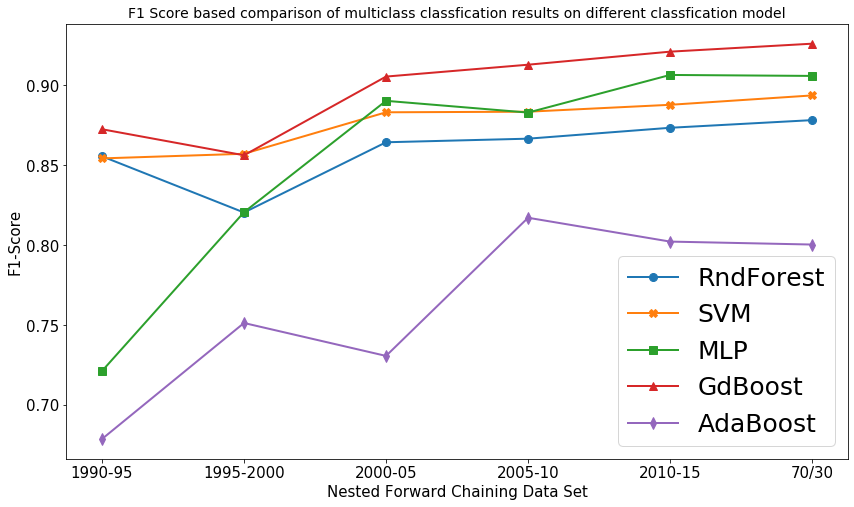

In [0]:
x=['1990-95','1995-2000','2000-05','2005-10','2010-15','70/30']
Model_name=['RndForest','SVM','MLP','GdBoost','AdaBoost','NB','LogitBoost','KNN']
plt.figure(figsize=(14,8))
mar=['o','X','s','^','d','h','1','P']

for i in range(5):
  if(i!=6):
    plt.plot(x,all_f1[i],label=Model_name[i],linewidth=2,marker=mar[i],markersize=8)
plt.xticks(x,fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Nested Forward Chaining Data Set",fontsize=15)
plt.ylabel("F1-Score",fontsize=15)
plt.title("F1 Score based comparison of multiclass classfication results on different classfication model",fontsize=14)
plt.legend(fontsize=25)

In [0]:
RF: 87
svm: 89
DT: 91
MLP: 90.5
gradient boosting : 92

In [0]:
columns_name=['budget',  'Dir Total Gross', 'Dir Avg Gross', 'Cast Total Rev',
       'Total Tenure', 'Cast ADC Rating','Cast Top Profit', 'Cast top avg profit',
       'Cast ADC Freq', 'Cast ADC Profit', 'Cast Total Members',
       'Cast Mean No Movies ', 'Cast Total Movies', 'Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western',
       'Season', 'AGE', 'CastNovelty', 'AvgAnnualProfit', 'APPG_ROI',
       'AWPG_ROI', 'Competition', 'Gross_all', 'Gross_true', 'Gross_genre',
       'ROI_true', 'ROI_all', 'Count_true', 'Count_all', 'Success_true',
       'Success_all', 'plot_topic', 'SM', 'CM', 'RM']

In [0]:
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
Cast ADC Profit,0.817945
budget,0.154910
Dir Avg Gross,0.005220
Competition,0.004164
Dir Total Gross,0.003422
Cast Mean No Movies,0.003370
bud_Share,0.002520
AvgAnnualProfit,0.001555
Cast ADC Freq,0.001170
Cast Total Rev,0.000971


In [0]:
!pip install rfpimp

In [0]:
from rfpimp import permutation_importances
from sklearn.metrics import r2_score

def r2(rf, X_train, y_train):
    return r2_score(y_train, rf.predict(X_train))



In [0]:
perm_imp_rfpimp = permutation_importances(clf, X_train, y_train, r2)

In [0]:
perm_imp_rfpimp.head(50)

,Importance
Feature,
Cast ADC Profit,1.889405
budget,0.352529
Dir Total Gross,0.057581
Dir Avg Gross,0.049296
Cast ADC Freq,0.029412
Cast Mean No Movies,0.014085
Cast top avg profit,0.010771
Count_true_y,0.010356
Cast Total Rev,0.008285


# Co relation Analysis

In [0]:
X=Fset
X['Class']=Y_Lash
f = plt.figure(figsize=(19, 15))
plt.matshow(X.corr(), fignum=f.number)
plt.xticks(range(X.shape[1]), X.columns, fontsize=14, rotation=90)
plt.yticks(range(X.shape[1]), X.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);


NameError: ignored

In [0]:
Fset_clean.head()

,budget,ROI,Profit,Year,Dir Total Gross,Dir Avg Gross,Dir Avg Rating,Director Total Profit,Director Avg Profit,Director Top Profit,Cast Total Rev,Cast Mean Rev,Cast Mean Avg Rev,Total Tenure,Average Tenure,Cast Total Proft,Cast total Avg Profit,Cast Avg Profit,Cast Top Profit,Cast top avg profit,Cast Avg Rating,Cast ADC Freq,Cast ADC Profit,Cast ADC Rating,Cast Mean top Profit,Full Cast Mean Rev,Cast Total Members,Cast Mean No Movies,Cast Total Movies,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,Month,Day,Season,AGE,WAGE,CastNovelty,AvgAnnualProfit,APPG,AWPG,Competition,APPG_ROI,APPG_Profit,AWPG_Profit,AWPG_ROI,Gross_all,Gross_true,Gross_genre,Gross_Pred,ROI_true,ROI_Pred,ROI_all,Count_Pred,Count_true,Count_all,Success_Pred,Success_true,Success_all,plot_topic_15,plot_topic,Class_Lash,Class_Gao
0,30000000.0,11.451801,343554033.0,1995,2.256015e+09,451203061.2,6.84,1.696015e+09,339203061.2,407366869.0,4.403574e+10,3.387365e+09,2.778921e+08,324.326988,24.948230,3.368970e+10,2.832560e+09,2.178892e+08,8.669697e+08,4.066577e+08,6.723986,28,3.635916e+08,7.449231,7.157361e+08,3.387365e+09,13,12.461538,162,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,10,30,4,59.846154,59.846154,85.529328,6.649194e+07,44.444444,4.066490e+09,1.774918e+10,28.888889,22.222222,3.844918e+09,268.557666,1.806497e+08,0.023282,4205968.0,NaN,0.165113,NaN,-47.736445,NaN,0.071429,28.0,NaN,0.100000,10.0,11,25,1,1
1,120000000.0,2.027157,243258859.0,1998,2.256015e+09,451203061.2,6.84,1.696015e+09,339203061.2,407366869.0,4.786192e+10,3.190795e+09,2.565331e+08,324.326988,21.621799,3.497368e+10,2.781109e+09,1.854073e+08,8.737842e+08,3.873244e+08,6.552608,27,2.707210e+08,6.767667,5.098528e+08,3.104426e+09,16,12.375000,198,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,11,25,5,80.437500,80.437500,113.507799,6.103606e+07,72.727273,4.973089e+09,2.096968e+10,25.757576,25.757576,3.788660e+09,218.798010,5.392672e+08,0.253670,136796159.0,NaN,0.047608,NaN,-133.006695,NaN,0.074074,54.0,NaN,0.166667,12.0,2,25,2,1
2,90000000.0,4.526299,407366869.0,1999,2.256015e+09,451203061.2,6.84,1.696015e+09,339203061.2,407366869.0,6.167396e+10,4.111597e+09,3.086467e+08,414.464363,27.630958,4.693092e+10,3.577106e+09,2.384738e+08,8.947619e+08,4.401401e+08,6.769288,30,3.821909e+08,7.349333,7.735367e+08,3.446563e+09,24,11.208333,269,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,10,30,4,62.583333,62.583333,85.529328,4.729240e+07,66.666667,4.396886e+09,1.883128e+10,15.942029,28.985507,3.752078e+09,72.692425,5.012503e+08,0.027727,13898003.0,NaN,0.091670,NaN,-199.970690,NaN,0.083333,60.0,NaN,0.000000,10.0,2,25,1,1
3,120000000.0,2.849860,341983149.0,2006,2.256015e+09,451203061.2,6.84,1.696015e+09,339203061.2,407366869.0,7.346842e+10,4.897895e+09,2.219246e+08,462.815800,30.854387,5.183302e+10,2.373671e+09,1.582448e+08,1.124219e+09,3.582698e+08,6.411548,30,3.459550e+08,6.549333,6.958987e+08,2.405153e+09,48,9.520833,457,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,8,3,63.416667,63.416667,113.507799,5.246519e+07,76.153846,1.157137e+10,2.279605e+10,21.538462,23.076923,9.343217e+09,239.405111,1.122906e+09,0.375150,421258424.0,NaN,0.146747,NaN,-206.275304,NaN,0.132353,68.0,NaN,0.133333,15.0,2,25,1,1
4,200000000.0,1.799262,359852396.0,2011,2.256015e+09,451203061.2,6.84,1.696015e+09,339203061.2,407366869.0,6.220148e+10,4.146765e+09,2.256892e+08,436.594865,29.106324,4.314500e+10,2.330778e+09,1.553852e+08,1.217000e+09,3.582698e+08,6.393344,25,3.531051e+08,6.016000,6.630053e+08,2.411027e+09,47,9.659574,454,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,11,3,55.744681,55.744681,113.507799,6.726644e+07,79.084967,1.990432e+10,2.612943e+10,21.568627,32.679739,1.760678e+10,176.216261,9.413714e+08,0.298489,280989325.0,0.322188,0.164414,0.248158,-176.085804,0.142536,0.172414,58.0,0.166351,0.133333,15.0,0,25,2,0


In [0]:
corr = Mine.corr()
corr.style.background_gradient(cmap='coolwarm')


In [0]:
Fset_clean.describe()

,budget,ROI,Profit,Year,Dir Total Gross,Dir Avg Gross,Dir Avg Rating,Director Total Profit,Director Avg Profit,Director Top Profit,Cast Total Rev,Cast Mean Rev,Cast Mean Avg Rev,Total Tenure,Average Tenure,Cast Total Proft,Cast total Avg Profit,Cast Avg Profit,Cast Top Profit,Cast top avg profit,Cast Avg Rating,Cast ADC Freq,Cast ADC Profit,Cast ADC Rating,Cast Mean top Profit,Full Cast Mean Rev,Cast Total Members,Cast Mean No Movies,Cast Total Movies,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,Month,Day,Season,AGE,WAGE,CastNovelty,AvgAnnualProfit,APPG,AWPG,Competition,plot_topic,APPG_ROI,APPG_Profit,AWPG_Profit,AWPG_ROI,Gross_all,Gross_true,Gross_genre,Gross_Pred,ROI_true,ROI_Pred,ROI_all,Count_Pred,Count_true,Count_all,Success_Pred,Success_true,Success_all
count,5.019000e+03,5019.000000,5.019000e+03,5019.000000,5.019000e+03,5.019000e+03,5019.000000,5.019000e+03,5.019000e+03,5.019000e+03,5.019000e+03,5.019000e+03,5.019000e+03,5019.000000,5019.000000,5.019000e+03,5.019000e+03,5.019000e+03,5.019000e+03,5.019000e+03,5019.000000,5019.000000,5.019000e+03,5019.000000,5.019000e+03,5.019000e+03,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5.019000e+03,4989.000000,5.019000e+03,4.954000e+03,5019.000000,4989.000000,4989.000000,5.019000e+03,5019.000000,4.686000e+03,4686.000000,4.686000e+03,1478.000000,4686.000000,1478.000000,4686.000000,1438.000000,4686.000000,4686.000000,1478.000000,4686.000000,4686.000000
mean,3.258562e+07,7.748983,6.192002e+07,1999.426977,6.326329e+08,9.450564e+07,6.266408,4.253514e+08,6.192002e+07,1.649625e+08,1.785851e+10,1.285767e+09,1.108930e+08,213.263452,15.562133,1.208405e+10,1.045021e+09,7.492392e+07,9.324975e+08,2.220561e+08,6.331089,16.054194,6.241830e+07,6.268844,2.906625e+08,9.856904e+08,24.356446,7.082779,151.068141,0.260410,0.180514,0.051604,0.347280,0.162582,0.010361,0.478781,0.101215,0.093843,0.004981,0.041443,0.113170,0.036063,0.084080,0.185495,0.121737,0.000199,0.285316,0.035864,0.017533,6.954971,15.333333,3.163977,24.481097,24.481097,63.740356,5.970992e+07,69.892076,6.062125e+09,1.801816e+10,2.025304,29.305634,18.385779,4.802290e+09,294.942112,5.890914e+08,0.182412,1.067388e+08,0.171574,0.173007,0.191850,-120.282307,0.171612,0.177366,45.260137,0.161499,0.165715,10.402902
std,4.091488e+07,192.194501,1.432417e+08,15.987253,1.166864e+09,1.254333e+08,0.742776,8.939523e+08,1.010003e+08,2.476471e+08,1.482159e+10,9.997179e+08,6.986227e+07,106.895774,7.005685,1.062246e+10,8.251109e+08,5.457291e+07,5.341990e+08,1.456861e+08,0.467162,6.259712,1.380679e+08,0.882679,1.897819e+08,7.747657e+08,20.780128,4.030889,105.037895,0.438902,0.384653,0.221248,0.476153,0.369021,0.101269,0.499599,0.301644,0.291640,0.070408,0.199331,0.316832,0.186465,0.277536,0.388737,0.327015,0.014115,0.451610,0.185969,0.131261,3.372391,8.476909,1.252820,18.372846,18.372846,28.945748,2.099938e+07,11.658987,5.328370e+09,5.556841e+09,1.943697,15.779838,10.509170,4.779376e+09,1123.917367,3.493862e+08,0.168211,1.169568e+08,0.102994,0.368947,0.138688,72.814584,0.095965,0.131213,23.454308,0.155420,0.169680,5.118308
min,5.000000e+02,-0.999999,-1.657101e+08,1915.000000,6.000000e+00,6.000000e+00,0.000000,-9.022320e+07,-7.162618e+07,-7.162618e+07,1.576500e+04,5.255000e+03,5.255000e+03,0.000000,0.000000,-1.379544e+09,-1.379544e+09,-9.196958e+07,-9.196958e+07,-9.196958e+07,1.485908,1.000000,-1.189591e+08,0.000000,-9.196958e+07,5.255000e+03,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

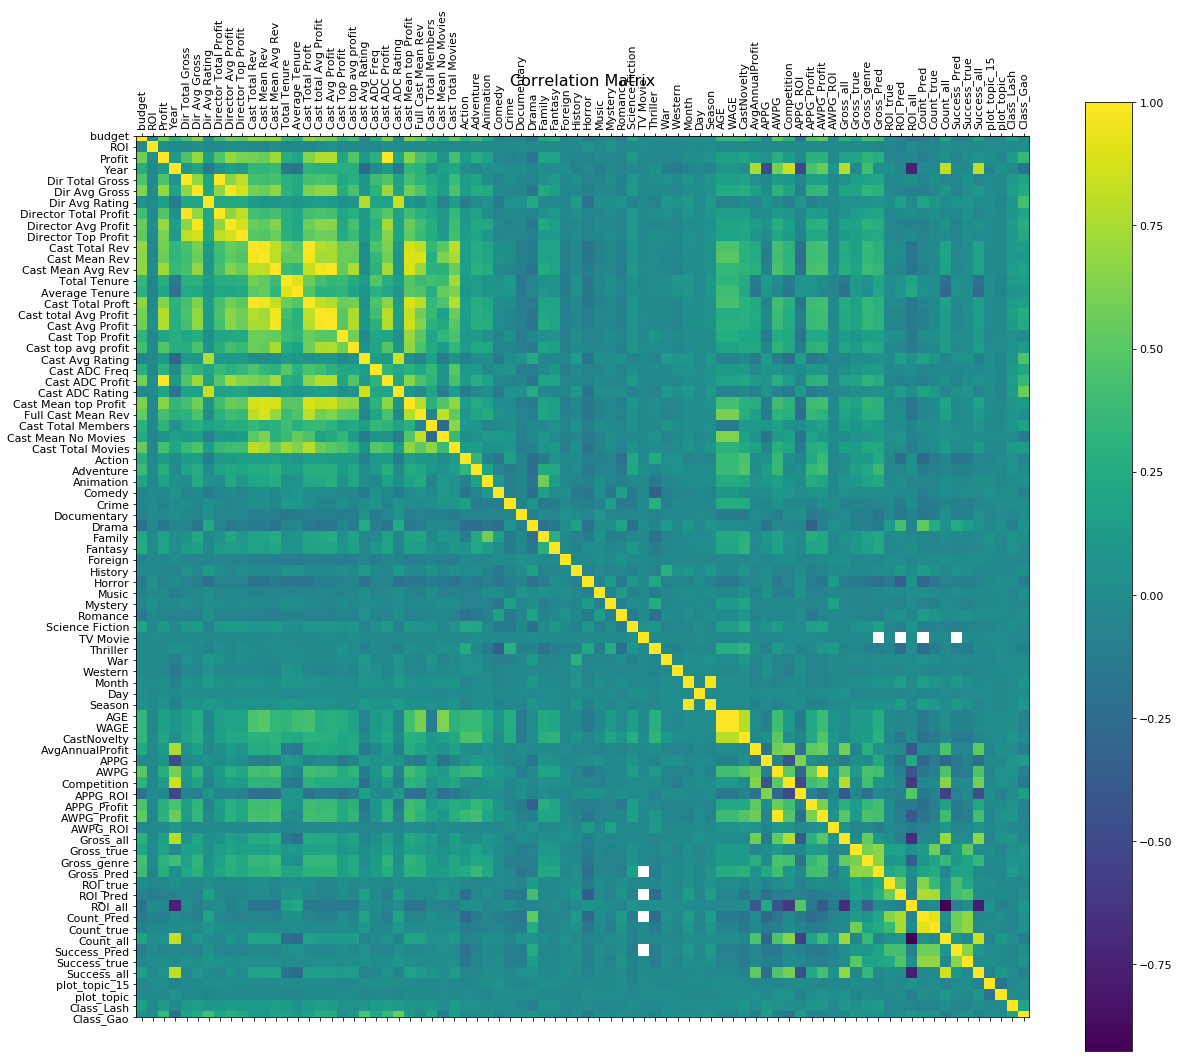

In [0]:

f = plt.figure(figsize=(20, 17))
plt.matshow(Fset_clean.corr(), fignum=f.number)
plt.xticks(range(Fset_clean.shape[1]), Fset_clean.columns, fontsize=11, rotation=90)
plt.yticks(range(Fset_clean.shape[1]), Fset_clean.columns, fontsize=11)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=11)
plt.title('Correlation Matrix', fontsize=16);

In [0]:
from scipy.stats import pearsonr
import seaborn as sb


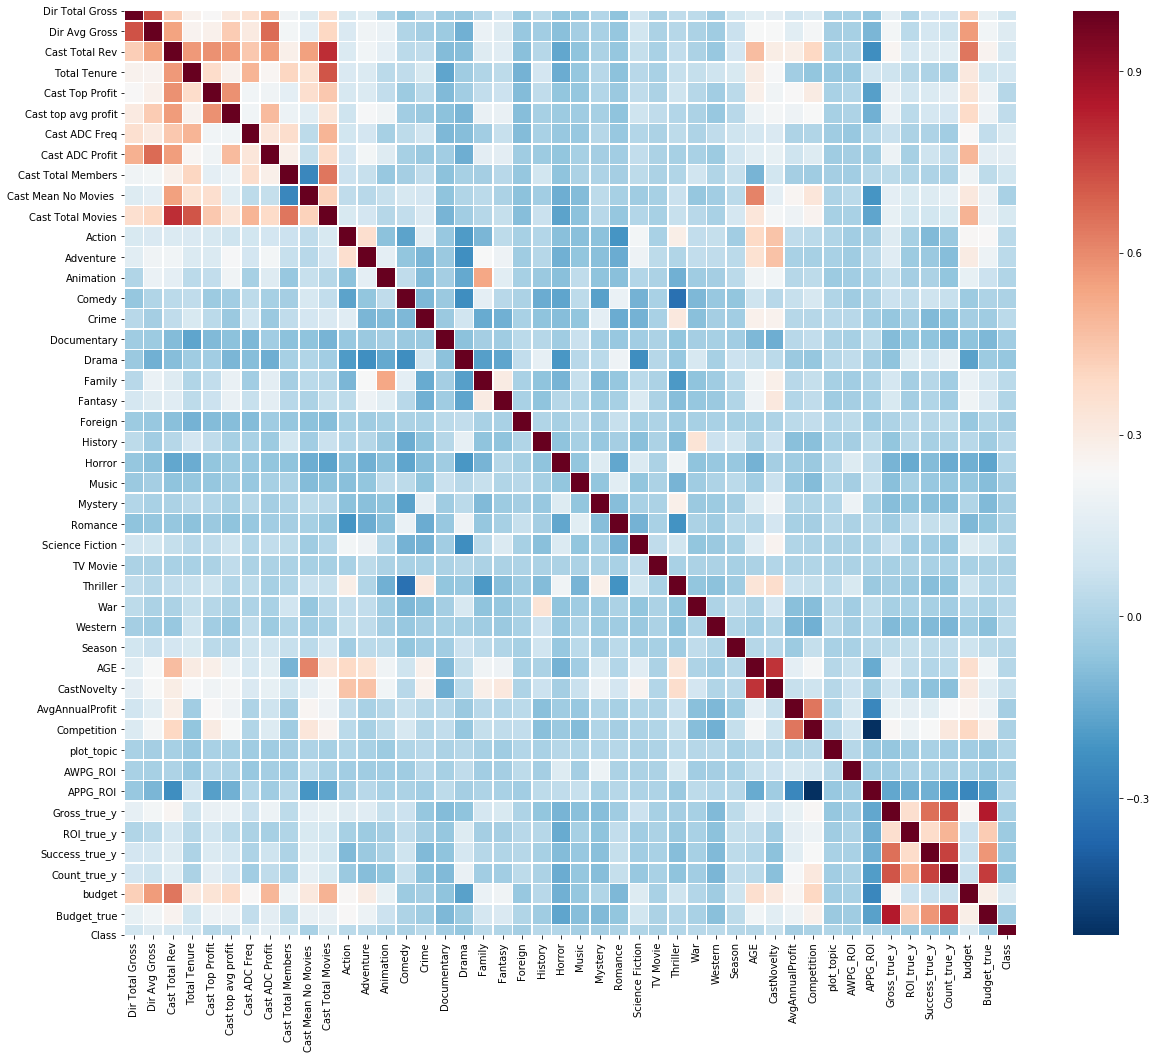

In [0]:
pearsoncorr = X_train.corr(method='pearson')
plt.figure(figsize=(20, 17))
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=False,
            linewidth=0.5)

# info gain

In [0]:
from sklearn.feature_selection import SelectFromModel


In [0]:
X_train,X_test,y_train,y_test = train_test_split(Mine,Y_Gao,test_size=0.3)


In [0]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 500))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=500, n_jobs=None,
                                                 oob_score=False,
                                                 random_state=None, verbose=0,
  

In [0]:
sel.get_support()

array([ True,  True,  True,  True,  True, False, False,  True, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [0]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

9

Index(['budget', 'Dir Total Gross', 'Dir Avg Gross', 'Director Top Profit',
       'Cast Total Rev', 'Cast top avg profit', 'Cast ADC Profit',
       'Cast Mean No Movies ', 'Competition'],
      dtype='object')


In [0]:
X_train.columns

'Dir Total Gross'

Feature ranking:
1 45 0.7077556428786799 Class
2 7 0.060281484667616604 Cast ADC Profit
3 43 0.016748770169988644 budget
4 1 0.016177711707860778 Dir Avg Gross
5 35 0.014014753463919673 Competition
6 38 0.012762063243295544 APPG_ROI
7 9 0.00953386113616795 Cast Mean No Movies 
8 2 0.009383718657893352 Cast Total Rev
9 0 0.009302627021003368 Dir Total Gross
10 6 0.008991191445503236 Cast ADC Freq
11 8 0.007436791936426456 Cast Total Members
12 5 0.007142406061741209 Cast top avg profit
13 34 0.007108510675138918 AvgAnnualProfit
14 42 0.006896724513690017 Count_true_y
15 4 0.006624840993797871 Cast Top Profit
16 10 0.006570835483844794 Cast Total Movies
17 44 0.006458498458166365 Budget_true
18 3 0.006382687863573435 Total Tenure
19 32 0.006318180759546572 AGE
20 33 0.00571657096930308 CastNovelty
21 39 0.005581256533646341 Gross_true_y
22 41 0.005170720291544223 Success_true_y
23 31 0.005091187938351553 Season
24 37 0.004987308504258813 AWPG_ROI
25 40 0.004843835780156461 ROI_true_y
26 

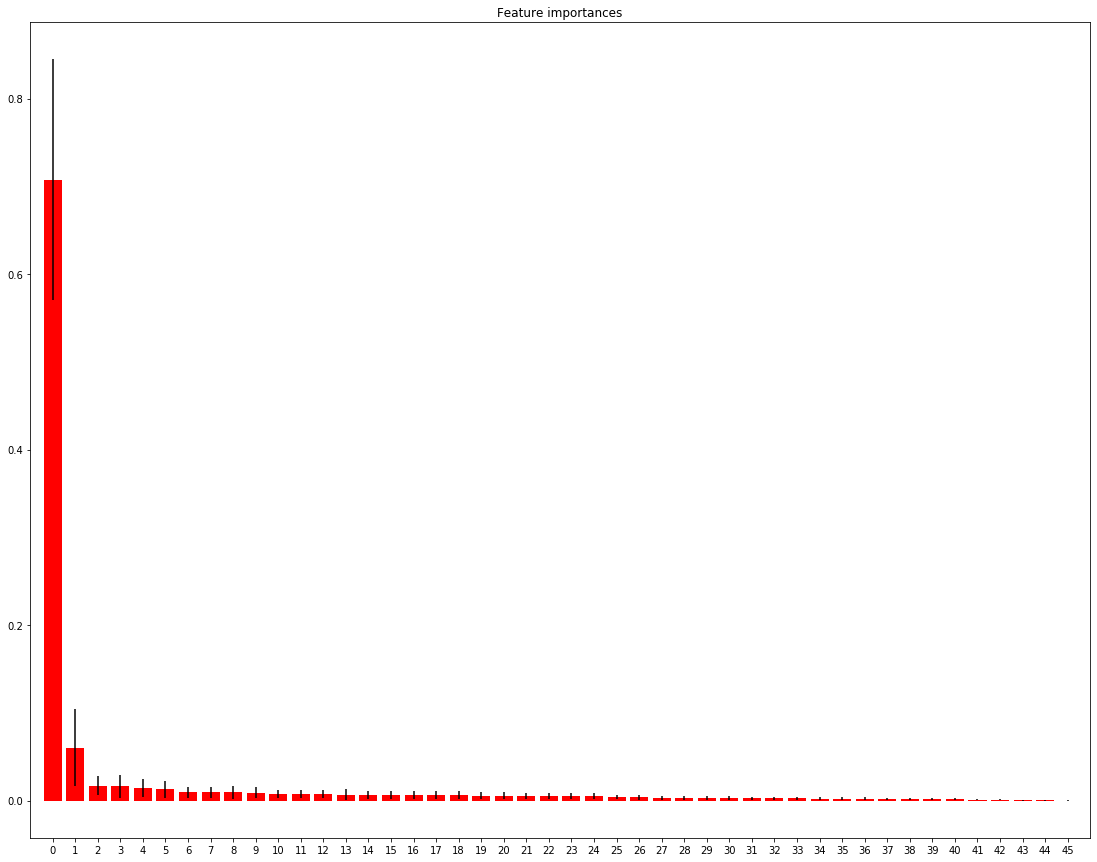

In [0]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier



# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=500,
                              random_state=0)

forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
col=[]
for f in range(X_train.shape[1]):
    print(f + 1, indices[f], importances[indices[f]],X_train.columns[indices[f]])
    col.append(X_train.columns[indices[f]])

# Plot the feature importances of the forest
plt.figure(figsize=(19, 15))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# New release date

In [0]:
Fset=Fset_Full1

In [0]:
Mine2=Fset.drop(['Dir Avg Rating','genres', 'Cast Avg Rating', 'overview', 'popularity',
       'release_date', 'cast','First_Genre', 'Rep_Genre', 'vote_average', 'vote_count','dir', 'Gross_Pred_x', 'ROI_Pred_x',  'Count_Pred_x', 
        'Success_Pred_x','Class_Lash', 'actor1rating',
       'actor1experience', 'actor1score', 'actor2rating', 'actor2experience',
       'actor2score', 'actor3rating', 'actor3experience', 'actor3score',
       'Director_Rating', 'Genre_Score', 'Gross_all_x', 'Gross_true_x', 'Gross_genre_x',
       'ROI_true_x', 'ROI_all_x', 'Count_true_x', 'Count_all_x',
       'Success_true_x', 'Success_all_x', 'plot_topic_15','Director_Experience'],axis=1)
#'Cast ADC Rating'
Y_Lash=Fset.Class_Lash

In [0]:
Mine2['Class_Lash']=Fset.Class_Lash
Working=Mine2.loc[Mine2.Year==2017,['Class_Lash','Genre','budget', 'id','revenue','Profit', 'ROI', 'original_title', 'Year','Month', 'Season', 'Gross_true_y','Gross_all_y' ,'Gross_genre_y', 'Gross_Pred_y',
       'ROI_true_y', 'ROI_Pred_y', 'ROI_all_y', 'Count_Pred_y', 'Count_true_y',
       'Count_all_y', 'Success_Pred_y', 'Success_true_y', 'Success_all_y',
       'Budget_all', 'Budget_movie', 'Budget_true', 'Budget_Pred']]
Working['GP']=Working.Gross_true_y+Working.ROI_true_y+Working.Success_true_y+Working.Budget_true+Working.Count_true_y
Working=Working[['Class_Lash','GP','Genre','budget', 'id','revenue', 'ROI', 'original_title', 'Year','Month', 'Season','Gross_all_y', 'Gross_genre_y','Budget_all', 'Budget_movie',]]

In [0]:
Mine2.loc[(Mine2.Year==2010) & (Mine2.Genre=='Action'),['Class_Lash','Genre','budget', 'id','revenue','Profit', 'ROI', 'original_title', 'Year','Month', 'Season']]

In [0]:
Working.set_value(Working.loc[Working.Rep_Genre=='Action'].index,'Month',12)

In [0]:
Working['NR']=(Working.Gross_genre_y- Working.Budget_movie)/Working.Budget_movie

In [0]:
Working['BR']=Working.budget/Working.Budget_movie

In [0]:
Working.loc[Working.Season==1,['Class_Lash','Class_New','ROI','Genre','budget','Gross_genre_y','Budget_movie',	'NR','BR']]

In [0]:
Working.reset_index(inplace=True)
c=Working.NR.describe(percentiles=[.30, .70] )

Class=[]
s=0
f=0
a=0
for i in range(0,len(Working)):
  if((Working.loc[i].NR > (c['70%']))):
      Class.append(1)
      s=s+1
  elif( (Working.loc[i].NR <(c['30%']) )):
    f=f+1
    Class.append(0)
  else:
    Class.append(2)
    a=a+1
Working['Class_New']= Class
print(s,a,f)

11 41 15


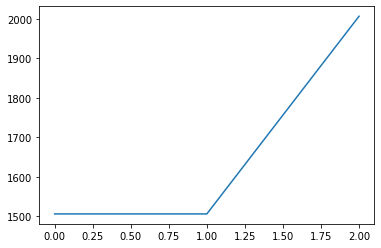

In [0]:
plt.plot(Fset.groupby('Class_Lash')['budget'].count())

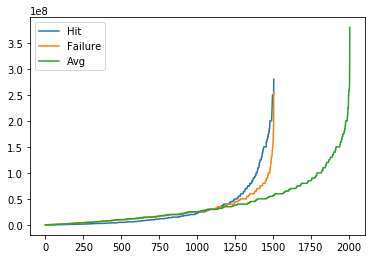

In [0]:
plt.plot(Fset.loc[Fset.Class_Lash==1].budget.reset_index(drop=True).sort_values().values,label='Hit')
plt.plot(Fset.loc[Fset.Class_Lash==0].budget.reset_index(drop=True).sort_values().values,label='Failure')

plt.plot(Fset.loc[Fset.Class_Lash==2].budget.reset_index(drop=True).sort_values().values,label='Avg')
plt.legend()

In [0]:
Fset.loc[Fset.Class_Lash==1].budget.reset_index(drop=True).sort_values().values

array([2.5e+03, 6.0e+03, 7.0e+03, ..., 2.5e+08, 2.5e+08, 2.8e+08])

# the numbers

In [0]:
df=pd.read_csv("/content/drive/My Drive/thesis/Movies_Summary_5738.csv")
df = df.drop('Unnamed: 0',axis=1)
df.head(2)

,No,Release_Date,Title,Production Budget,Domestic_Gross,Worldwide_Gross,URL,Genre:,MPAA Rating:,Franchise:,Keywords:,Synopsis:,Source:,Creative Type:,Production Countries:,Running Time:,Production Method:,Production Companies:
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",https://www.the-numbers.com/movie/Avatar#tab=...,Action,PG-13,Avatar,"3-D, Invented Language, Visual Effects, Alien ...","Jake Sully is a wounded ex-marine, thrust into...",Original Screenplay,Science Fiction,United States,162 minutes,Animation/Live Action,"Dune Entertainment, 20th Century Fox, Ingeniou..."
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",https://www.the-numbers.com/movie/Pirates-of-...,Adventure,PG-13,Pirates of the Caribbean,"Pirates, Zombies, Visual Effects, Romance, Epi...",When Captain Jack Sparrow crosses paths with t...,Based on Theme Park Ride,Fantasy,United States,136 minutes,Live Action,Walt Disney Pictures


In [0]:
df['Production Budget']=df['Production Budget'].str.replace('$',' ')
df['Production Budget']=df['Production Budget'].str.replace(',','')
df['Production Budget']=df['Production Budget'].astype(int)
df['Worldwide_Gross']=df['Worldwide_Gross'].str.replace('$',' ')
df['Worldwide_Gross']=df['Worldwide_Gross'].str.replace(',','')
df['Worldwide_Gross']=df['Worldwide_Gross'].astype(int)
df.drop(df.loc[(df.Worldwide_Gross==0)].index,inplace=True)
df.drop(df.loc[(df['Genre:'].isna())].index,inplace=True)

d=df[['Release_Date', 'Title', 'Production Budget','Worldwide_Gross', 'URL', 'Genre:']]
def get_season(i):
    
    if (i ==1)|(i==2): 
        return 1  #Winter
    if (i ==3)|(i==4): 
        return 2   #Spring
    if (i>4) & (i<9): 
        return 3 #Summer
    if (i ==9) |( i==10): 
        return 4  #Fall
    if (i ==11)|( i==12): 
        return 5 #Holiday
d['Year']=pd.DatetimeIndex(d.Release_Date).year
d['Month']=pd.DatetimeIndex(d.Release_Date).month
d['Day']=pd.DatetimeIndex(d.Release_Date).day

d['Season']=d.Month.apply(get_season)
d.columns=['Release_Date', 'Title', 'Budget', 'Gross', 'URL', 'Genre','Year','Month','Day','Season']
d['ROI']=(d.Gross-d.Budget)/d.Budget

In [0]:
d.reset_index(inplace=True)
c=d.ROI.describe(percentiles=[.30, .70] )

Class=[]
s=0
f=0
a=0
for i in range(0,len(d)):
  if((d.loc[i].ROI > (c['70%']))):
      Class.append(1)
      s=s+1
  elif( (d.loc[i].ROI <(c['30%']) )):
    f=f+1
    Class.append(0)
  else:
    Class.append(2)
    a=a+1
d['Class_New']= Class
print(s,a,f)
d.drop(['index','Day'],axis=1,inplace=True)

1555 2072 1555


In [0]:
d.Genre=d.Genre.replace('Thriller/Suspense','Thriller')
d.Genre=d.Genre.replace('Romantic Comedy','Romance')
d.Genre=d.Genre.replace('Musical','Music')

In [0]:
x=pd.merge(d,gggm, how='left',on=['Year','Month','Genre'])

In [0]:
x['NR']=((x.Gross_genre+x.Gross)- x.Budget_movie-x.Budget)/(x.Budget_movie+x.Budget)
#x['GP']=x.Gross_true+x.ROI_true+x.Success_true+x.Budget_true+x.Count_true
#x['NR']=x['ROI']/x['NR']
x=x[['Release_Date', 'Title', 'Budget', 'Gross', 'Genre', 'Year',
       'Month', 'Season', 'ROI', 'Class_New', 'Gross_genre','Budget_movie', 'NR']]

In [0]:
c=x.NR.describe(percentiles=[.30, .70] )

Class=[]
s=0
f=0
a=0
for i in range(0,len(d)):
  if((x.loc[i].NR > (c['70%']))):
      Class.append(1)
      s=s+1
  elif( (x.loc[i].NR <(c['30%']) )):
    f=f+1
    Class.append(0)
  else:
    Class.append(2)
    a=a+1
x['Class']= Class
print(s,a,f)


1521 2140 1521


In [0]:
x.loc[(x.Year>=2016) & (x.Year<2017)].Class.value_counts()

2    76
0    68
1    57
Name: Class, dtype: int64

In [0]:
y=x.loc[(x.Year>=2016) & (x.Year<2017)]
y=y[['Release_Date', 'Title', 'Budget', 'Gross', 'Genre', 'Year', 'Month','Season', 'ROI', 'Class_New', 'NR', 'Class']]
xx=x.loc[(x.Year>=2016) & (x.Year<2017)].index
for z in xx:
  y.set_value(z,'Month',np.random.randint(1,12))
  y.set_value(z,'Year',np.random.randint(2015,2018))
  value = abs(np.random.randint(1,12))
  #value= abs(y.loc[z].Month-np.random.randint(1,4))
  #value= abs(y.loc[z].Month+np.random.randint(1,6))%12
  if(value==0):
    value = 12
  #y.set_value(z,'Month',value )

In [0]:
y=pd.merge(y,gggm, how='left',on=['Year','Month','Genre'])


In [0]:
#For popular
for g in y.Genre.unique():
  #print(y.loc[y.Genre==x].Budget_movie.max())
  y.set_value(y.loc[y.Genre==g].index,'Budget_movie',y.loc[y.Genre==g].Budget_movie.max())
  y.set_value(y.loc[y.Genre==g].index,'Gross_genre',y.loc[y.Genre==g].Gross_genre.max())

In [0]:
#y['NR_new']=((y.Gross_genre+y.Gross)- y.Budget_movie-y.Budget)/(y.Budget_movie+y.Budget)
y['NR_new']=((y.Gross_genre)- y.Budget_movie)/(y.Budget_movie)
#x['GP']=x.Gross_true+x.ROI_true+x.Success_true+x.Budget_true+x.Count_true
y['NR_new']=y['ROI']*y['NR_new']

In [0]:
y=y[['Release_Date', 'Title', 'Budget', 'Gross', 'Genre', 'Year', 'Month',
       'Season', 'ROI', 'Class_New', 'NR', 'Class',
       'Gross_genre', 'Budget_movie','NR_new']]

In [0]:
c=y.NR_new.describe(percentiles=[.30, .70] )

Class=[]
s=0
f=0
a=0
for i in range(0,len(y)):
  if((y.loc[i].NR_new > (c['70%']))):
      Class.append(1)
      s=s+1
  elif( (y.loc[i].NR_new <(c['30%']) )):
    f=f+1
    Class.append(0)
  else:
    Class.append(2)
    a=a+1
y['N_lbl']= Class
print(s,a,f)

59 83 59


In [0]:
y.Class.value_counts()

2    76
0    68
1    57
Name: Class, dtype: int64

In [0]:
for u in range(3):
  print(y.loc[y.Class==u].N_lbl.value_counts())

1    36
2    27
0     5
Name: N_lbl, dtype: int64
0    33
2    14
1    10
Name: N_lbl, dtype: int64
2    42
0    21
1    13
Name: N_lbl, dtype: int64


In [0]:
for u in range(3):
  print(y.loc[y.Class_New==u].N_lbl.value_counts())

1    47
2     6
Name: N_lbl, dtype: int64
0    49
2     8
1     8
Name: N_lbl, dtype: int64
2    69
0    10
1     4
Name: N_lbl, dtype: int64


In [0]:
y['change']=0
for i in range(y.shape[0]):
  if(y.loc[i].Class != y.loc[i].N_lbl):
    y.set_value(i,'change',1)

In [0]:
y['change_true']=0
for i in range(y.shape[0]):
  if(y.loc[i].Class_New != y.loc[i].N_lbl):
    y.set_value(i,'change_true',1)

In [0]:
y.shape[0],y.change.sum(),y.change_true.sum()

(201, 142, 120)

In [0]:
print(y.change.sum()/y.shape[0],y.change_true.sum() /y.shape[0])

0.7064676616915423 0.5970149253731343


In [0]:
(127/201)*100

63.18407960199005

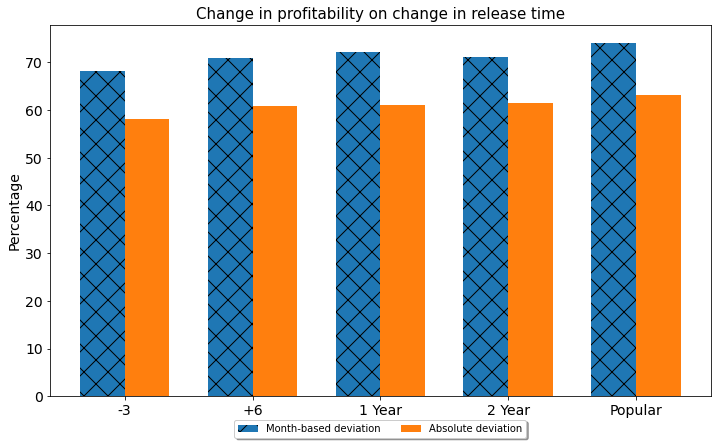

In [0]:
patterns = [ "x" , "\\" , "|" , "*" , "+" , "x", "o", "O", ".", "*" ]

labels = ['-3', '+6', '1 Year', '2 Year', 'Popular']
C_t = [68.134,70.8,72.1,71.14,74.14]
C_R = [58.184,60.9,61.1,61.5,63.18]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width/2, C_t, width, label='Month-based deviation',hatch=patterns[5])
rects2 = ax.bar(x + width/2, C_R, width, label='Absolute deviation')

ax.set_ylabel('Percentage',fontsize=14)
ax.set_title('Change in profitability on change in release time',fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=14)
ax.legend(fontsize=14)
fig.tight_layout()
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
plt.rcParams.update({'font.size': 10})
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#autolabel(rects1)
#autolabel(rects2)
plt.show()

[Text(0.0, 0, '\nActual Class'),
 Text(0.2, 0, 'Flop  Avg  Hit\n -3 mon '),
 Text(0.4, 0, 'Flop  Avg  Hit\n+6 mon'),
 Text(0.6000000000000001, 0, 'Flop  Avg  Hit\n1 Year'),
 Text(0.8, 0, 'Flop  Avg  Hit\n2 Year'),
 Text(1.0, 0, 'Flop  Avg  Hit\nPopular')]

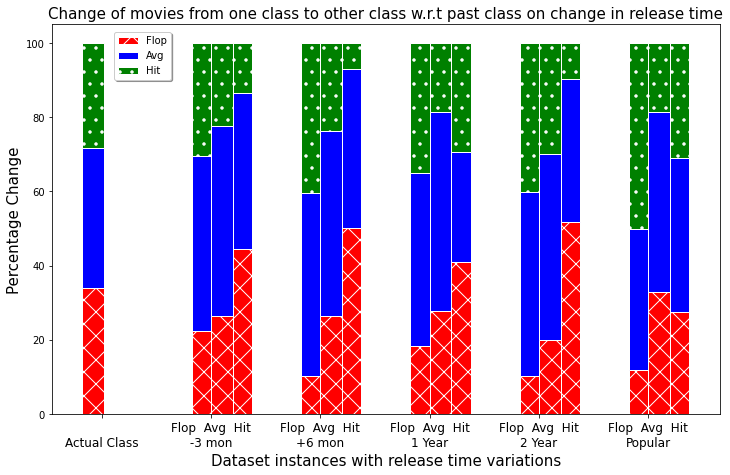

In [0]:
ddf = pd.DataFrame(dict(
    F=[33.83,22.29, 10.29, 18.23,10.29,11.76],
    H=[28.36,30.35, 40.41, 35,40,50],
    A=[37.81,47.35,49.29,46.76, 49.70, 38.23],
   ))
ddH = pd.DataFrame(dict(
    F=[0,44.38, 50.14,40.87,51.69,27.36],
    H=[0,13.50,7.017,29.39,9.77,31.05],
    A=[0,42.10,42.84,29.82,38.57,41.57],
   ))
ddA = pd.DataFrame(dict(
    F=[0,26.31, 26.31,27.63,20,32.89],
    H=[0,22.36,23.68,18.42,30,18.42],
    A=[0,51.31,50,53.94,50,48.68],
   ))
labels = ['\nActual Class','Flop  Avg  Hit\n -3 mon ', 'Flop  Avg  Hit\n+6 mon', 'Flop  Avg  Hit\n1 Year', 'Flop  Avg  Hit\n2 Year', 'Flop  Avg  Hit\nPopular']
x = np.arange(len(labels))  # the label locations
patterns = [ "x" , "|" , "|" , "." , "+" , "x", "o", "O", ".", "*" ]

fig, ax = plt.subplots(figsize=(10,6))
fig.tight_layout()

width = 0.35
a_bar_list = [ax.bar(x- width/2, ddf.F, align='edge', width= 0.2,color='red',edgecolor='white',hatch=patterns[0]), 
               ax.bar(x- width/2, ddf.A, align='edge', width= 0.2,color='blue',bottom=ddf.F,edgecolor='white'),
               ax.bar(x- width/2, ddf.H, align='edge', width= 0.2,color='green',bottom=ddf.F+ddf.A,edgecolor='white',hatch=patterns[3])]
b_bar_list = [ax.bar(x+ width/2, ddH.F, align='edge',color='red', width= 0.2,edgecolor='white',hatch=patterns[0]), 
               ax.bar(x+ width/2, ddH.A, align='edge', width= 0.2,color='blue',bottom=ddH.F,edgecolor='white'),
               ax.bar(x+ width/2, ddH.H, align='edge', width= 0.2,color='green',bottom=ddH.F+ddH.A,edgecolor='white',hatch=patterns[3])]
c_bar_list = [ax.bar(x, ddA.F, align='edge', width= 0.2,color='red',edgecolor='white',label='Flop',hatch=patterns[0]), 
               ax.bar(x, ddA.A, align='edge', width= 0.2,bottom=ddA.F,color='blue',edgecolor='white',label='Avg'),
               ax.bar(x, ddA.H, align='edge', width= 0.2,bottom=ddA.F+ddA.A,color='green',edgecolor='white',label='Hit',hatch=patterns[3])]
ax.set_ylabel('Percentage Change',fontsize=15)
ax.set_xlabel('Dataset instances with release time variations',fontsize=15)
ax.legend(loc='center left', bbox_to_anchor=(0.085, 0.92), fancybox=True, shadow=True, ncol=1)
  
ax.set_title('Change of movies from one class to other class w.r.t past class on change in release time',fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=12)
#ax.legend(fontsize=13,loc='center left', bbox_to_anchor=(1, 0.8))  


# rEGRESSION

In [0]:
all_acc_b=[]

In [0]:
Fset_Cust=Fset[['actor1rating',	'actor1experience',	'actor1score','actor2experience', 'actor2score', 'actor3rating', 'actor3experience',
       'actor3score', 'Director_Rating','Director_Experience','Dir Total Gross',  'Genre_Score','Year','Class_Lash']]

In [0]:
Fset.ROI/=Fset.ROI.max()

In [0]:
#Train test split based on Time series
start_year=1990
acc=[]
f1=[]
for i in range(6):
  
  
  end_year=start_year+5
  if (i==5):
    end_year=2019
    #Train test split based on Time series
  X_train=Fset_Cust.loc[Fset_Cust.Year < start_year]
  X_test=Fset_Cust.loc[(Fset_Cust.Year >= start_year) & (Fset_Cust.Year <end_year)]

  y_train=Fset.loc[Fset_Cust.Year < start_year].ROI
  y_test=Fset.loc[(Fset_Cust.Year >= start_year) & (Fset_Cust.Year <end_year)].ROI
  
  #clf = RandomForestClassifier(n_estimators=200, max_depth=30,random_state=10)
  #clf = SVC(kernel="linear",max_iter=1000000)
  #clf = tree.DecisionTreeClassifier()
  #clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
  #clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
  #clf = AdaBoostClassifier(n_estimators=100,learning_rate=1.0)
  #clf = GaussianNB()
  #clf=LogitBoost(n_estimators=200, random_state=0)
  #clf=KNeighborsClassifier(n_neighbors=5)
  #clf = VotingClassifier(estimators=[('xgb', xg_reg), ('rf', clf2), ('svm', clf3),('gdb', clf4)], voting='soft')

  
  X_train.drop(['Class_Lash','Year'],axis=1,inplace=True)
  X_test.drop(['Class_Lash','Year'],axis=1,inplace=True)
  
  X_train=std.fit_transform(X_train)
  X_test=std.transform(X_test)
  clf = MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

  clf = clf.fit(X_train, y_train)
  y_pred =clf.predict(X_test)
  

  #clf.fit(X_train, y_train)
  #y_pred = clf.predict(X_test)
  print('MSE Test', mean_squared_error(y_test, y_pred))

  acc.append(mean_squared_error(y_test, y_pred))
  
  if(i!=4):
    start_year=end_year


MSE Test 9.004042990765877e-07
MSE Test 0.0001920685994444051
MSE Test 1.4292617081672496e-05
MSE Test 0.0010559125849746288
MSE Test 7.499849865427146e-07
MSE Test 1.4745235455672076e-06


In [0]:

all_acc_b.append(acc)


In [0]:
all_acc_b

[[1.870615883315941e-05,
  0.00018962979724869962,
  3.789873036468227e-06,
  0.0010473242754371213,
  7.066411388605405e-07,
  2.398792080452629e-06],
 [9.004042990765877e-07,
  0.0001920685994444051,
  1.4292617081672496e-05,
  0.0010559125849746288,
  7.499849865427146e-07,
  1.4745235455672076e-06]]

In [0]:
X_Gao=Fset_clean[['Cast Total Rev', 'Cast Total Proft','Cast Mean Rev','Cast total Avg Profit',
                  'Total Tenure','Cast Mean Avg Rev', 'Average Tenure','Day','Year' ,'Season',
       'Cast Top Profit','Cast top avg profit','Cast Avg Profit','Cast Avg Rating',
       'Dir Total Gross','Dir Avg Gross','Director Avg Profit','Dir Avg Rating',
       'Cast ADC Freq', 'Cast ADC Profit', 'Cast ADC Rating','plot_topic_15',
       'Action', 'Adventure','Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']]

In [0]:
#Train test split based on Time series
start_year=1990
acc=[]
f1=[]
for i in range(6):
  
  end_year=start_year+5
  if (i==5):
    end_year=2019
    #Train test split based on Time series
  X_train=X_Gao.loc[X_Gao.Year < start_year]
  X_test=X_Gao.loc[(X_Gao.Year >= start_year) & (X_Gao.Year <end_year)]

  y_train=Fset.loc[Fset_clean.Year < start_year].ROI
  y_test=Fset.loc[(Fset_clean.Year >= start_year) & (Fset_clean.Year <end_year)].ROI

  X_train=std.fit_transform(X_train)
  X_test=std.transform(X_test)
  clf = MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

  clf.fit(X_train, y_train.values)
  y_pred = clf.predict(X_test)
  print('MSE Test', mean_squared_error(y_test.values, y_pred))

  acc.append(mean_squared_error(y_test, y_pred))
  if(i!=4):
    start_year=end_year


MSE Test 1.3228528430087225e-06
MSE Test 0.00019081940104488757
MSE Test 8.334327079259407e-06
MSE Test 0.0010477383390007325
MSE Test 3.609676996110505e-06
MSE Test 7.124761163289939e-06


In [0]:

all_acc_b.append(acc)


In [0]:

Y_Lash=Y_Lash.replace('Average',2)
X_Lash=Fset.drop(['budget','Dir Avg Rating','genres','Profit',  'Cast Avg Rating','Cast ADC Rating','id', 'original_title', 'overview', 'popularity',
       'release_date', 'revenue','cast','Rep_Genre', 'Genre', 'vote_average', 'vote_count','dir','APPG', 'APPG_ROI', 'AWPG_ROI',
       'AWPG', 'Gross_all_x', 'Gross_true_x', 'Gross_genre_x', 'Gross_Pred_x',
       'ROI_true_x', 'ROI_Pred_x', 'ROI_all_x', 'Count_Pred_x', 'Count_true_x',
       'Count_all_x', 'Success_Pred_x', 'Success_true_x', 'Success_all_x','Month', 'Day', 'Full Cast Mean Rev', 'Cast Total Members',
       'Cast Mean No Movies ', 'Cast Total Movies','plot_topic_15','Count_all_y', 'Success_Pred_y', 'Success_true_y', 'Success_all_y',
       'Budget_all', 'Budget_movie', 'Budget_true', 'Budget_Pred', 'actor1rating',
       'actor1experience', 'actor1score', 'actor2rating', 'actor2experience',
       'actor2score', 'actor3rating', 'actor3experience', 'actor3score',
       'Director_Rating', 'First_Genre', 'Genre_Score', 'Director_Experience', 'Gross_all_y', 'Gross_true_y', 'Gross_genre_y', 'Gross_Pred_y',
       'ROI_true_y', 'ROI_Pred_y', 'ROI_all_y', 'Count_Pred_y', 'Count_true_y', 'Class_Gao'],axis=1)
X_Lash=X_Lash.fillna(0)

In [0]:
#Train test split based on Time series
start_year=1990
acc=[]
Y_Lash=X_Lash['ROI']
f1=[]
for i in range(6):
  X_Lash['Class_Lash']=Y_Lash
  X_Lash=X_Lash.fillna(0)
  
  end_year=start_year+5
  if (i==5):
    end_year=2019
  X_train=X_Lash.loc[X_Lash.Year < start_year]
  X_test=X_Lash.loc[(X_Lash.Year >= start_year) & (X_Lash.Year <end_year)]

  print('\n Time Period:',start_year, end_year,"\t",X_train.shape,X_test.shape)

  y_train=X_Lash.loc[X_Lash.Year < start_year].Class_Lash
  y_test=X_Lash.loc[(X_Lash.Year >= start_year) & (X_Lash.Year <end_year)].Class_Lash

  X_train.drop(['Class_Lash','Year','ROI'],axis=1,inplace=True)
  X_test.drop(['Class_Lash','Year','ROI'],axis=1,inplace=True)


  X_train=std.fit_transform(X_train)
  X_test=std.transform(X_test)
  
  clf = MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print('MSE Test', mean_squared_error(y_test, y_pred))

  acc.append(mean_squared_error(y_test, y_pred))
  if(i!=4):
    start_year=end_year



 Time Period: 1990 1995 	 (988, 50) (356, 50)
MSE Test 3.212807842859336e-05

 Time Period: 1995 2000 	 (1344, 50) (541, 50)
MSE Test 0.00019060600456826364

 Time Period: 2000 2005 	 (1885, 50) (702, 50)
MSE Test 7.216306115824415e-06

 Time Period: 2005 2010 	 (2587, 50) (954, 50)
MSE Test 0.0010507603564296297

 Time Period: 2010 2015 	 (3541, 50) (1019, 50)
MSE Test 1.9446577341298633e-06

 Time Period: 2010 2019 	 (3541, 50) (1478, 50)
MSE Test 3.7555001878782934e-06


In [0]:

all_acc_b.append(acc)


In [0]:
all_acc_b

[[1.870615883315941e-05,
  0.00018962979724869962,
  3.789873036468227e-06,
  0.0010473242754371213,
  7.066411388605405e-07,
  2.398792080452629e-06],
 [9.004042990765877e-07,
  0.0001920685994444051,
  1.4292617081672496e-05,
  0.0010559125849746288,
  7.499849865427146e-07,
  1.4745235455672076e-06],
 [1.3228528430087225e-06,
  0.00019081940104488757,
  8.334327079259407e-06,
  0.0010477383390007325,
  3.609676996110505e-06,
  7.124761163289939e-06],
 [3.212807842859336e-05,
  0.00019060600456826364,
  7.216306115824415e-06,
  0.0010507603564296297,
  1.9446577341298633e-06,
  3.7555001878782934e-06]]

In [0]:
Fset.ROI.min()

-7.758317010125665e-05

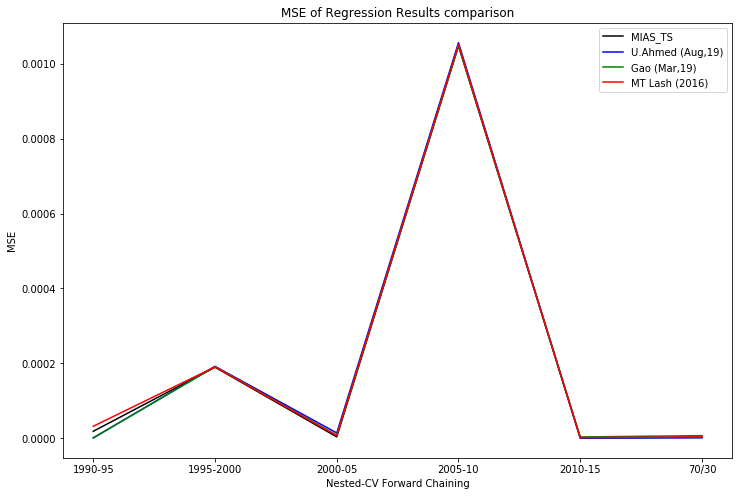

In [0]:
x=['1990-95','1995-2000','2000-05','2005-10','2010-15','70/30']
plt.figure(figsize=(12,8))
res=['MIAS_TS','U.Ahmed (Aug,19)','Gao (Mar,19)','MT Lash (2016)']
res2=['F1- U.Ahmed (Aug,19)','F1- Gao (Mar,2019)','F1 - MT Lash (2016)','F1- MIAS_TS']
colr=['-.k','-.b','-.g','-.r']
colr1=['-k','-b','-g','-r']
for i in range(4):
  if(i!=6):
    plt.plot(x,all_acc_b[i],colr1[i],label=res[i])
    #plt.plot(x,all_f1_b[i],'-.',label=res2[i])
plt.xticks(x)
plt.xlabel("Nested-CV Forward Chaining")
plt.ylabel("MSE")
plt.title("MSE of Regression Results comparison")
plt.legend()

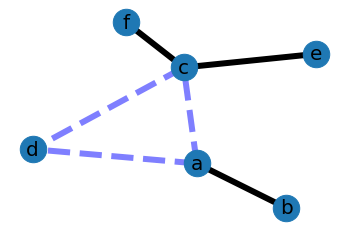

In [0]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge('a', 'b', weight=0.6)
G.add_edge('a', 'c', weight=0.2)
G.add_edge('c', 'd', weight=0.1)
G.add_edge('c', 'e', weight=0.7)
G.add_edge('c', 'f', weight=0.9)
G.add_edge('a', 'd', weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.5]

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge,
                       width=6)
nx.draw_networkx_edges(G, pos, edgelist=esmall,
                       width=6, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()

# New Section

In [0]:
all_f1=[[0.6557057693161739,
  0.6205356636426834,
  0.6644801042702092,
  0.6667254538475401,
  0.673542595306077,
  0.6783279564702576],
 [0.5813832957008523,
  0.6072847421181305,
  0.6032328271249379,
  0.6175973631634126,
  0.6279191020131207,
  0.6337801307013098],
 [0.5413379004229976,
  0.6207151291081024,
  0.690405405940163,
  0.683053587428623,
  0.7065925801246086,
  0.7159845585010463],
 [0.6726287724331784,
  0.6563456731972082,
  0.7055732178476928,
  0.7130016443193733,
  0.7211619670440475,
  0.7261486262468965],
 [0.5788301886792453,
  0.5514227177289389,
  0.5478301920890156,
  0.6172555438743566,
  0.6023438434589422,
  0.63204978981776897],
  [0.6857057693161739,
  0.6905356636426834,
  0.7104801042702092,
  0.7227254538475401,
  0.730542595306077,
  0.7413279564702576]
  ]

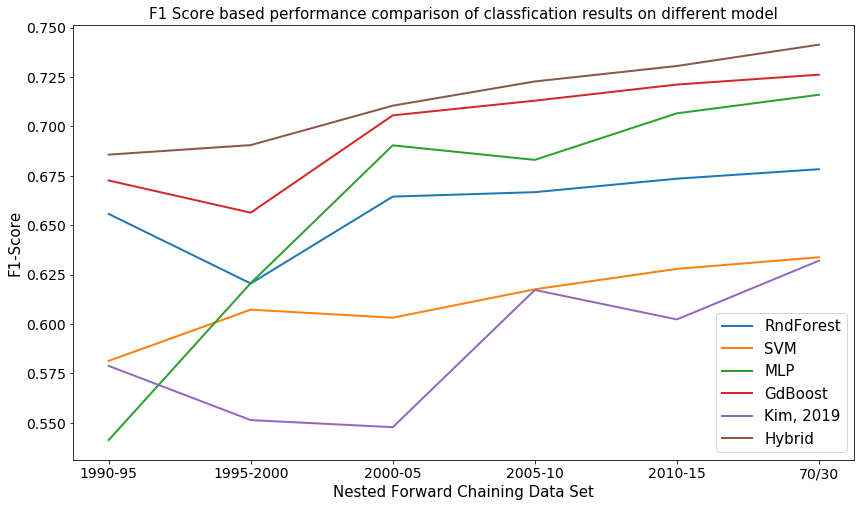

In [0]:

x=['1990-95','1995-2000','2000-05','2005-10','2010-15','70/30']
Model_name=['RndForest','SVM','MLP','GdBoost','Kim, 2019','Hybrid','LogitBoost','KNN']
plt.figure(figsize=(14,8))

for i in range(6):
  if(i!=7):
    plt.plot(x,all_f1[i],label=Model_name[i],linewidth=2)
plt.xticks(x,fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Nested Forward Chaining Data Set",fontsize=15)
plt.ylabel("F1-Score",fontsize=15)
plt.title("F1 Score based performance comparison of classfication results on different model",fontsize=15)
plt.legend(fontsize=15)